In [1]:
import sys  
sys.path.insert(0, '..')
from AT_funs import *

In [2]:
filename = 'WBD.MI.xlsx'
df = read_xlsx(filename)
ticker = filename.replace('xlsx', '')

filename_bm = 'FTSEMIB.MI.xlsx'
bm_df = read_xlsx(filename_bm)
bm_name = filename_bm.replace('xlsx', '')

In [3]:
bm_df

date     volume         high           low          open  \
0    2016-01-04 08:00:00  545475000  21194.00000  20702.000000  21186.000000   
1    2016-01-05 08:00:00  422559500  20983.00000  20722.000000  20938.000000   
2    2016-01-06 08:00:00  508538100  20931.00000  20373.000000  20922.000000   
3    2016-01-07 08:00:00  749548400  20289.00000  19629.000000  19778.000000   
4    2016-01-08 08:00:00  550008300  20350.00000  19869.000000  20189.000000   
...                  ...        ...          ...           ...           ...   
2124 2024-05-10 07:00:00  487475300  34748.00000  34483.000000  34508.000000   
2125 2024-05-13 07:00:00  503132600  34843.00000  34620.000000  34663.000000   
2126 2024-05-14 07:00:00  695326600  35190.00000  34800.000000  34811.000000   
2127 2024-05-15 07:00:00  730951200  35374.00000  35175.000000  35293.000000   
2128 2024-05-16 08:42:49          0  35440.71875  35314.898438  35398.171875   

             close     adj_close      ticker  
0     20734.000000  20734.000000  FTSEMIB.MI  
1     20983.000000  20983.000000  FTSEMIB.MI  
2     20422.000000  20422.000000  FTSEMIB.MI  
3     20189.000000  20189.000000  FTSEMIB.MI  
4     19869.000000  19869.000000  FTSEMIB.MI  
...            ...           ...         ...  
2124  34657.000000  34657.000000  FTSEMIB.MI  
2125  34816.000000  34816.000000  FTSEMIB.MI  
2126  35151.000000  35151.000000  FTSEMIB.MI  
2127  35366.000000  35366.000000  FTSEMIB.MI  
2128  35372.601562  35372.601562  FTSEMIB.MI  

[2129 rows x 8 columns]

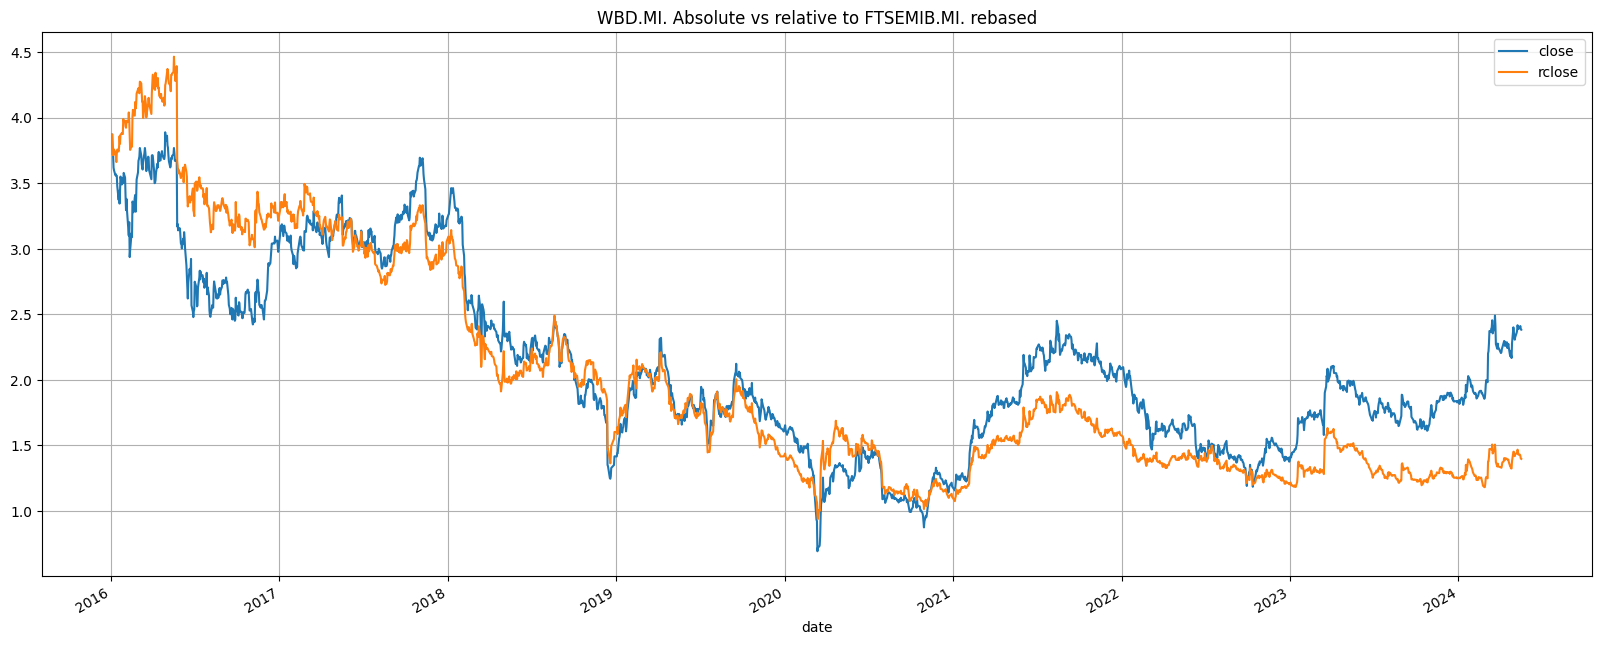

In [4]:
plot_abs_rel(df, ticker, bm_df, bm_name)

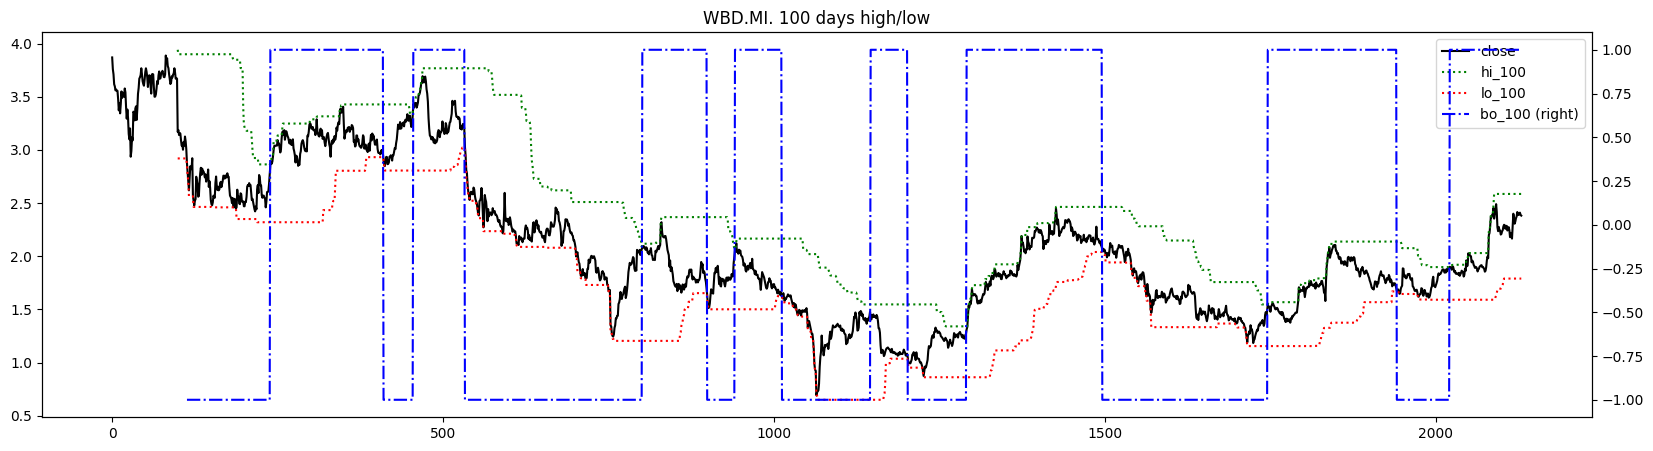

In [5]:
window_bo = 100
df_bo = df.copy()
df_bo = signal_bo(df_bo, window_bo)
bo_signal = 'bo_' + str(window_bo)
plot_signal_bo(df_bo, window_bo, ticker)

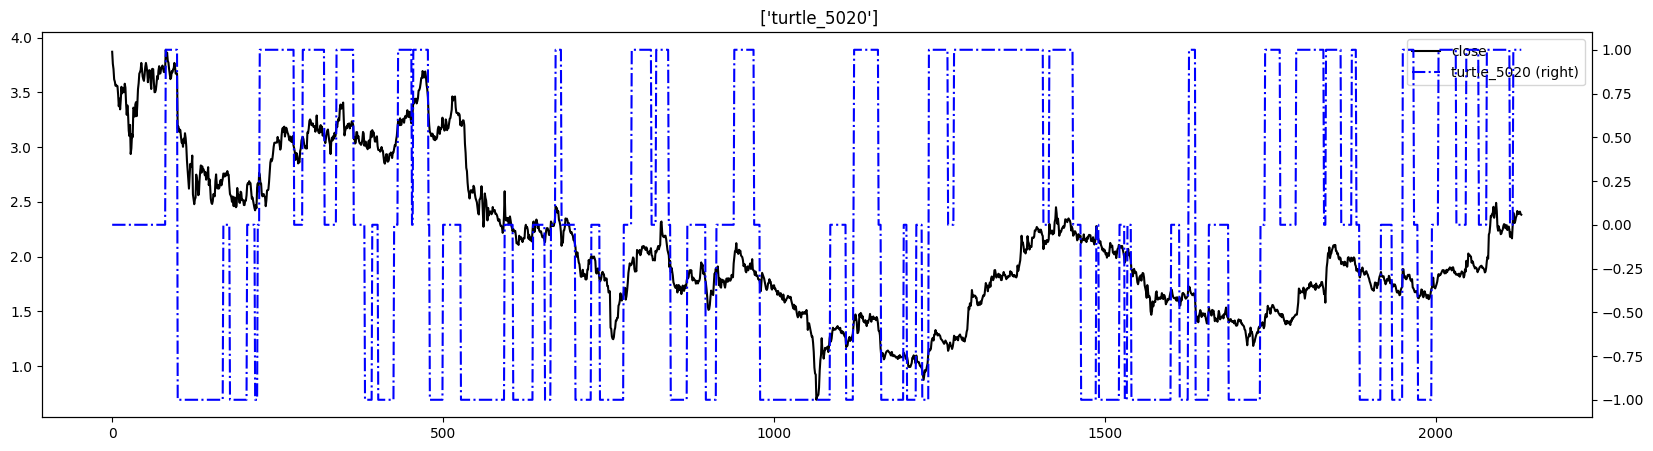

In [6]:
fast = 20
slow = 50
df_tt = df.copy()
df_tt = signal_tt(df_tt, fast = fast, slow = slow)
tt_signal = 'turtle_' + str(slow) + str(fast)
plot_signal_tt(df_tt, fast, slow)

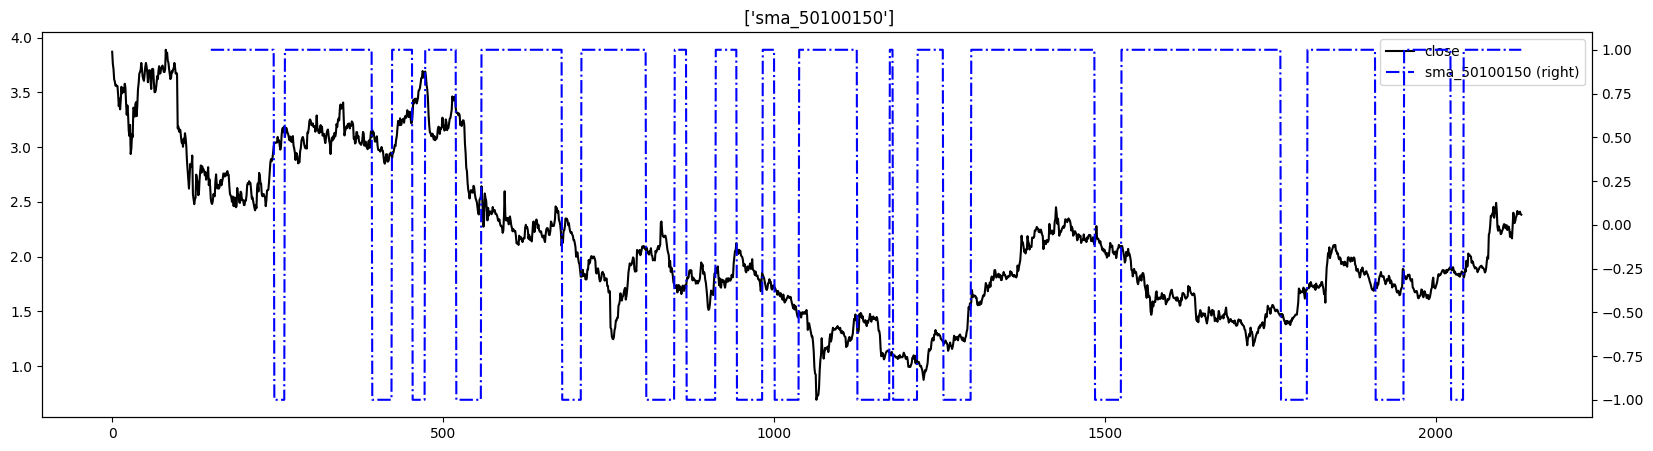

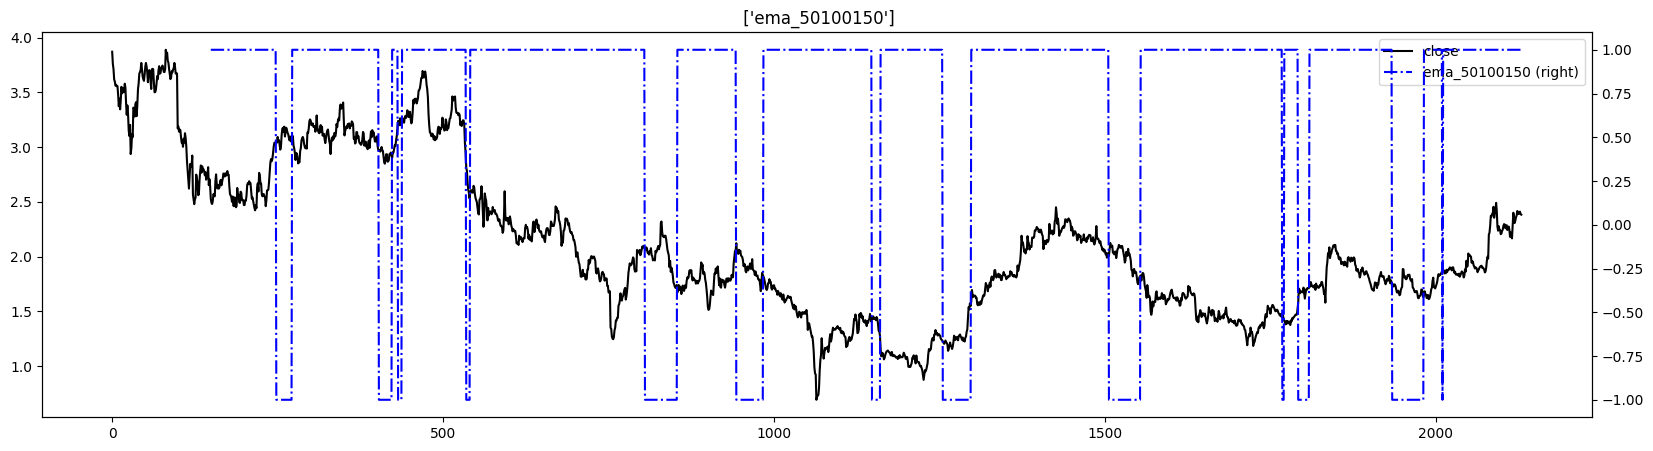

In [7]:
st = 50
mt = 100
lt = 150
df_ma = df.copy()
df_ma = signal_sma(df_ma, st, mt, lt)
df_ma = signal_ema(df_ma, st, mt, lt)

sma_signal = 'sma_' + str(st) + str(mt) + str(lt)
ema_signal = 'ema_' + str(st) + str(mt) + str(lt)

plot_signal_ma(df_ma, st, mt, lt)

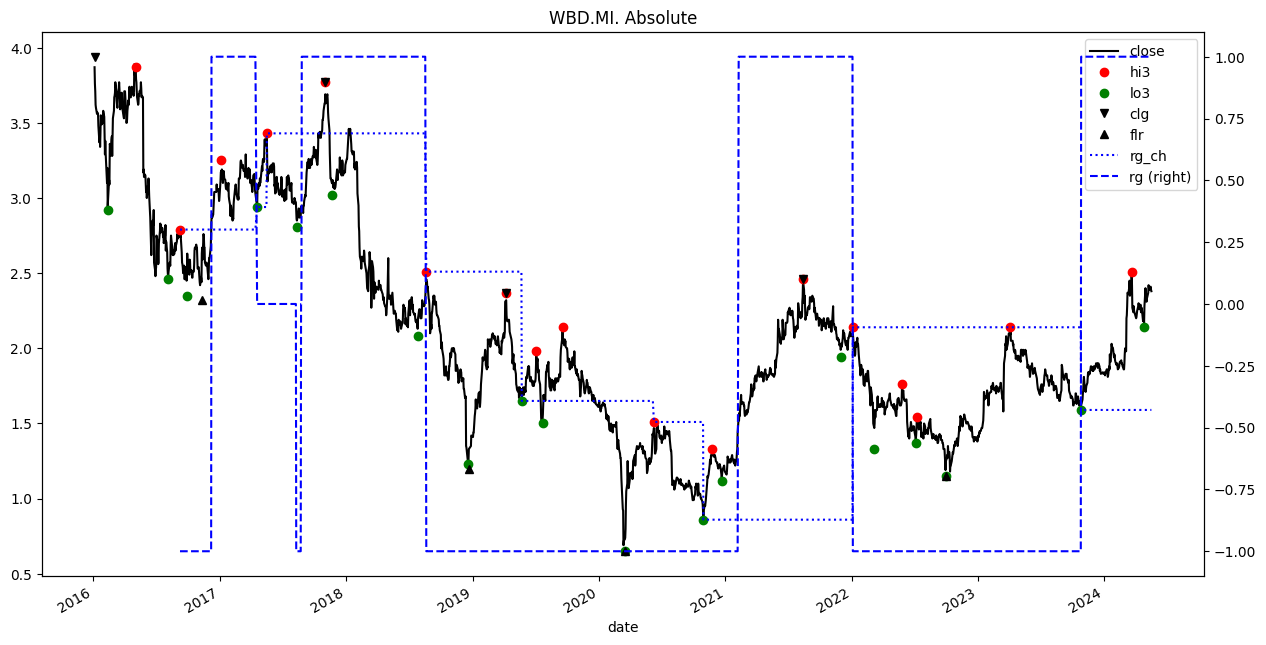

In [8]:
df_fc = df.copy()
df_fc = detect_regime(df_fc, bm_df)
fc_signal = 'rg'
fcr_signal = 'rrg'
plot_signal_abs(df_fc, ticker)

In [9]:
# df_fc = df_fc[['date', 
#        'ropen', 'rhigh', 'rlow', 'rclose', 'rh1', 'rl1', 'rh2', 'rl2', 'rh3',
#        'rl3', 'rh4', 'rl4', 'rrt', 'rrg', 'rflr', 'rclg', 'rrg_ch']]

# df_fc.to_excel('no_appendix.xlsx', index=False)

In [10]:
_o,_h,_l,_c = lower_upper_OHLC(df,relative = False)
rhs = ['hi1', 'lo1','hi2', 'lo2', 'hi3', 'lo3']
rt_hi,rt_lo,_hi,_lo,shi,slo = [rhs[h] for h in range(len(rhs))]
bm_col = 'close'
dgt = 5
df= relative(df,_o,_h,_l,_c, bm_df, bm_col, dgt= dgt, rebase=True)

params = ['2014-12-31', None, 63, 0.05, 0.05, 1.5, 2,5,2.5,3]
start,end,vlty_n,dist_pct,retrace_pct,threshold,dgt,d_vol,r_vol,lvl= [params[h] for h in range(len(params))]

swing_val = ['rg','lo1','hi1','lo3','hi3','clg','flr','rg_ch']
rg,rt_lo,rt_hi,slo,shi,clg,flr,rg_ch = [swing_val[s] for s in range(len(swing_val))]   

for a in np.arange(0,2):
    df = round(historical_swings(df,_o,_h,_l,_c, dist= None, hurdle= None),dgt)
    # df = cleanup_latest_swing(df,shi,slo,rt_hi,rt_lo)
    # ud, bs, bs_dt, _rt, _swg, hh_ll, hh_ll_dt = latest_swing_variables(df,shi,slo,rt_hi,rt_lo,_h,_l, _c)
    # vlty = round(average_true_range(df,_h,_l,_c, n= vlty_n)[hh_ll_dt],dgt)
    # dist_vol = d_vol * vlty
    # _sign = test_distance(ud,bs, hh_ll, dist_vol, dist_pct)
    # df = retest_swing(df, _sign, _rt, hh_ll_dt, hh_ll, _c, _swg)
    # retrace_vol = r_vol * vlty
    # df = retracement_swing(df, _sign, _swg, _c, hh_ll_dt, hh_ll, vlty, retrace_vol, retrace_pct)
    # stdev = df[_c].rolling(vlty_n).std(ddof=0)
    # df = regime_floor_ceiling(df,_h,_l,_c,slo, shi,flr,clg,rg,rg_ch,stdev,threshold)
    _o,_h,_l,_c = lower_upper_OHLC(df,relative = True)
    # rswing_val = ['rrg','rl1','rh1','rl3','rh3','rclg','rflr','rrg_ch']
    # rg,rt_lo,rt_hi,slo,shi,clg,flr,rg_ch = [rswing_val[s] for s in range(len(rswing_val))]
    


In [11]:
num_cols = df.select_dtypes(include=[np.number])  
sums = num_cols.sum()  
sums

volume       3.896413e+09
high         4.565390e+03
low          4.424850e+03
open         4.502860e+03
close        4.490770e+03
adj_close    4.051890e+03
ropen        4.279630e+03
rhigh        4.339480e+03
rlow         4.204520e+03
rclose       4.267670e+03
hi1          8.408900e+02
lo1          7.883200e+02
hi2          1.831100e+02
lo2          1.584400e+02
hi3          4.150000e+01
lo3          3.297000e+01
hi4          7.730000e+00
lo4          5.380000e+00
rh1          8.585700e+02
rl1          8.077700e+02
rh2          1.613900e+02
rl2          1.449800e+02
rh3          3.146000e+01
rl3          2.153000e+01
rh4          1.830000e+00
rl4          9.200000e-01
dtype: float64

1
1


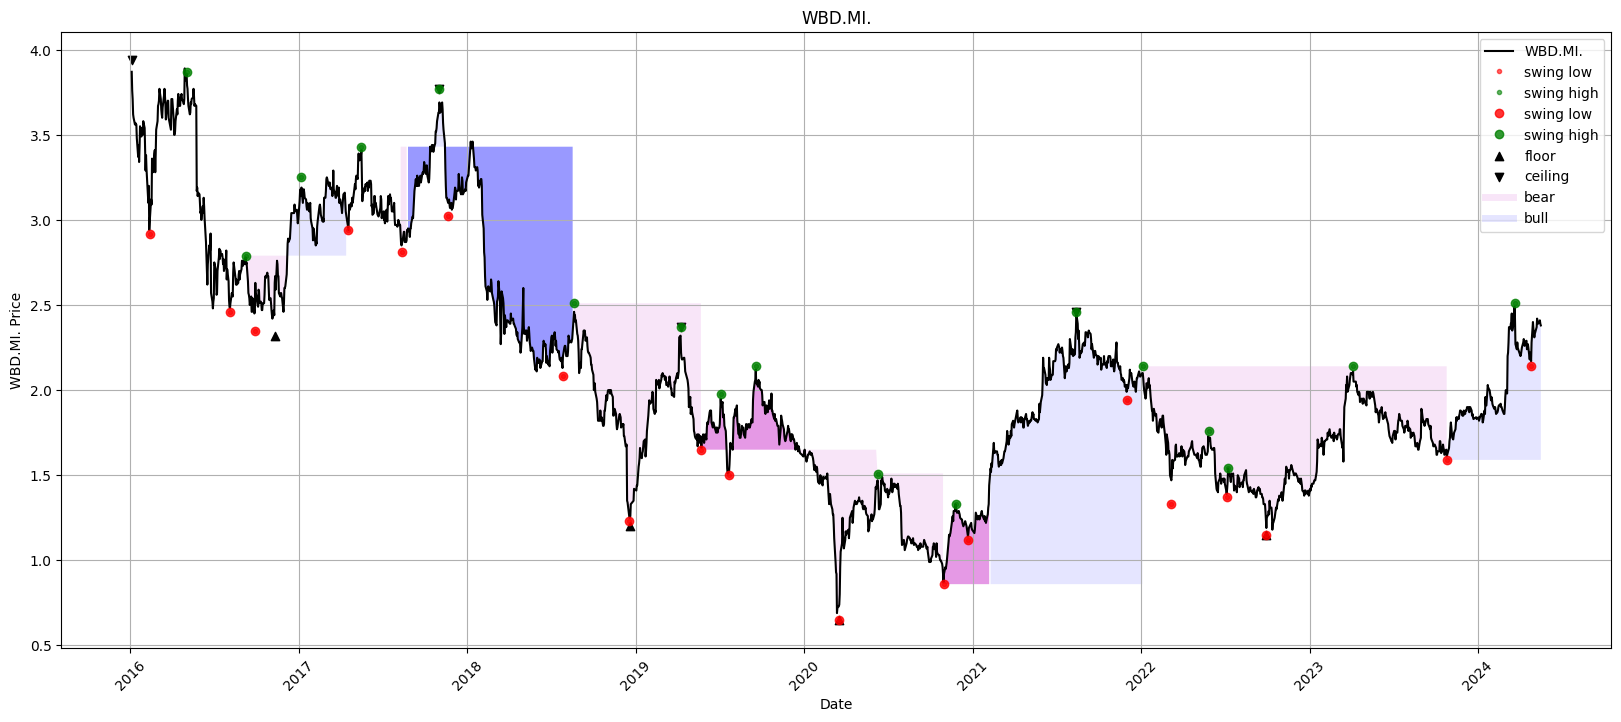

In [12]:
plot_regime_abs(df_fc, ticker)

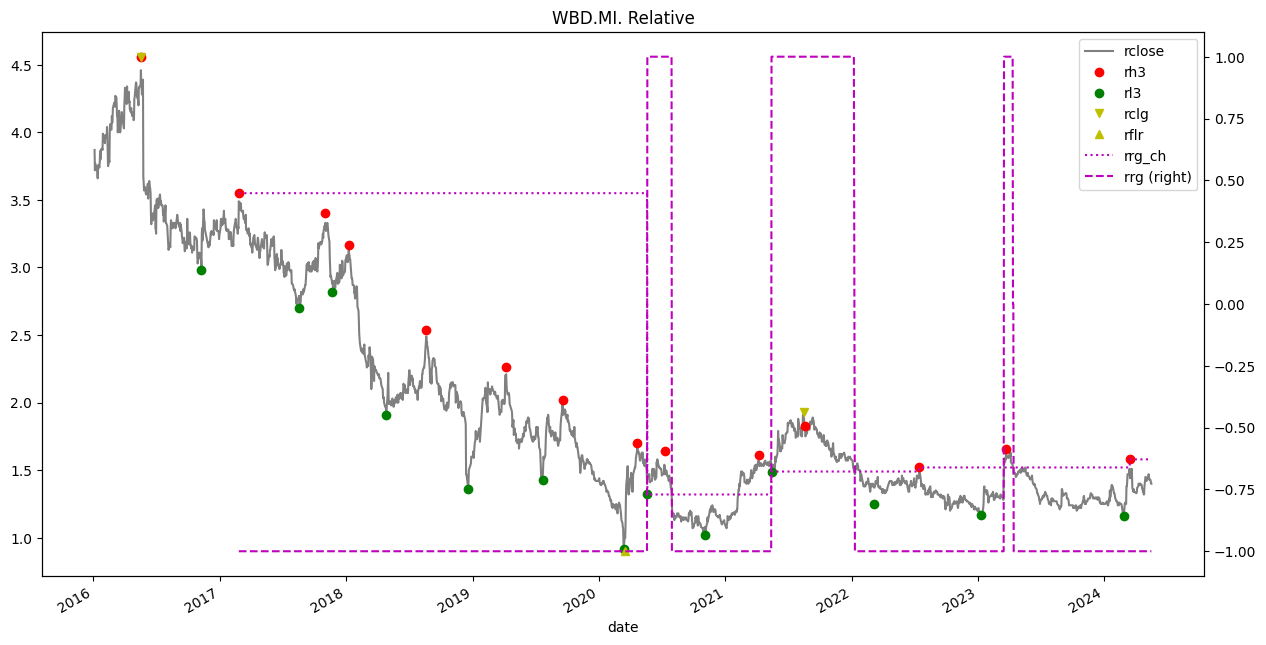

In [13]:
plot_signal_rel(df_fc, ticker)

1
1


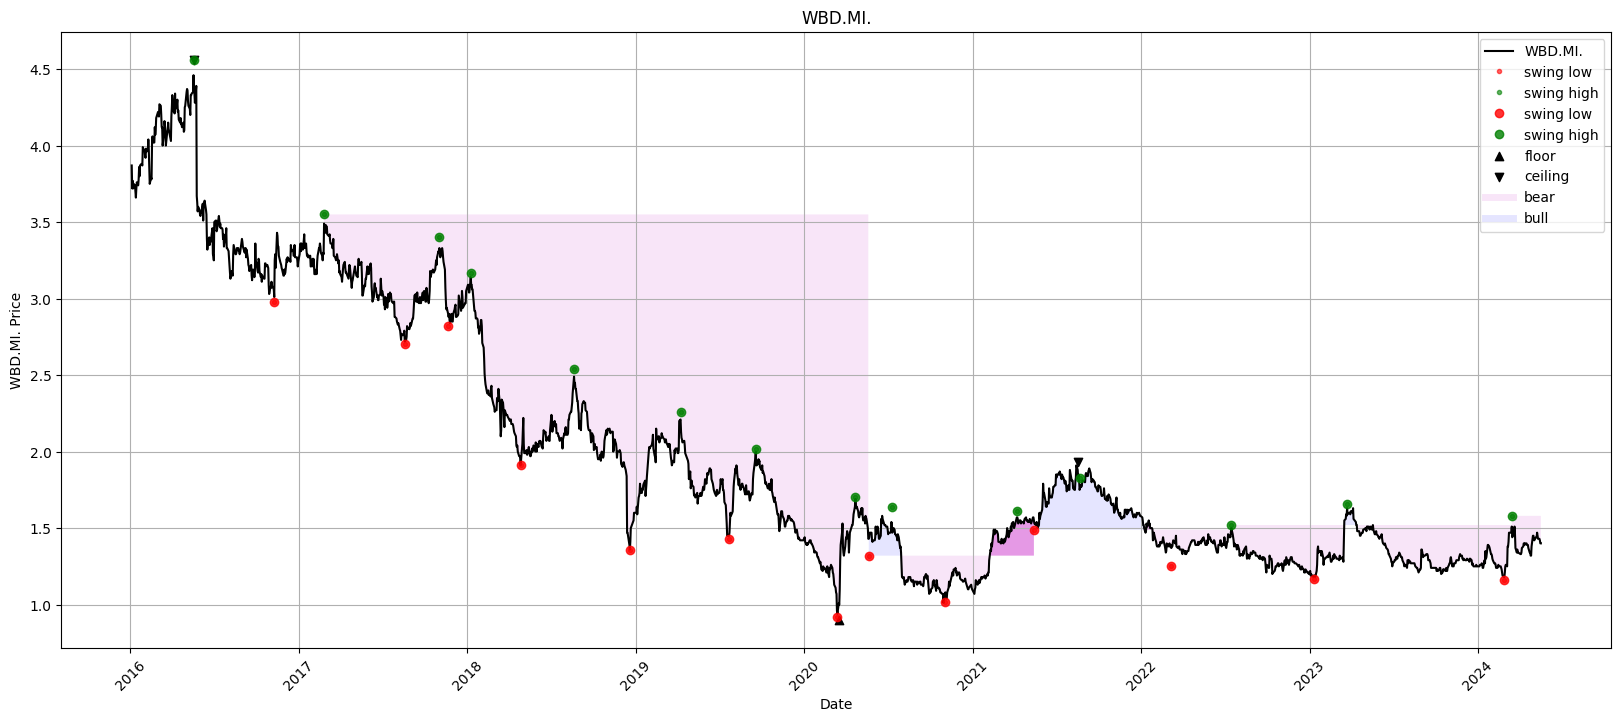

In [14]:
plot_regime_rel(df_fc, ticker)

In [15]:
df_fc

date   volume  high   low  open  close  adj_close  ticker  \
0    2016-01-04 08:00:00   726355  3.94  3.83  3.94   3.87       3.26  WBD.MI   
1    2016-01-05 08:00:00  1077659  3.88  3.76  3.86   3.76       3.17  WBD.MI   
2    2016-01-06 08:00:00  1045563  3.77  3.59  3.77   3.71       3.13  WBD.MI   
3    2016-01-07 08:00:00  1006703  3.65  3.55  3.62   3.62       3.05  WBD.MI   
4    2016-01-08 08:00:00   761745  3.72  3.60  3.66   3.60       3.03  WBD.MI   
...                  ...      ...   ...   ...   ...    ...        ...     ...   
2125 2024-05-10 07:00:00  2121855  2.43  2.31  2.39   2.39       2.39  WBD.MI   
2126 2024-05-13 07:00:00  1079456  2.40  2.37  2.38   2.40       2.40  WBD.MI   
2127 2024-05-14 07:00:00  1630959  2.42  2.38  2.40   2.41       2.41  WBD.MI   
2128 2024-05-15 07:00:00  1582057  2.42  2.36  2.42   2.39       2.39  WBD.MI   
2129 2024-05-16 08:32:04   217817  2.40  2.37  2.40   2.38       2.38  WBD.MI   

      ropen  rhigh  ...  rl2  rh3  rl3  rh4  rl4  rrt  rrg  rflr  rclg  rrg_ch  
0      3.94   3.94  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN     NaN  
1      3.81   3.83  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN     NaN  
2      3.83   3.83  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN     NaN  
3      3.72   3.75  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN     NaN  
4      3.82   3.88  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN   NaN     NaN  
...     ...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...     ...  
2125   1.43   1.45  ...  NaN  NaN  NaN  NaN  NaN  NaN -1.0   NaN   NaN    1.58  
2126   1.42   1.43  ...  NaN  NaN  NaN  NaN  NaN  NaN -1.0   NaN   NaN    1.58  
2127   1.41   1.43  ...  NaN  NaN  NaN  NaN  NaN  NaN -1.0   NaN   NaN    1.58  
2128   1.42   1.42  ...  NaN  NaN  NaN  NaN  NaN  NaN -1.0   NaN   NaN    1.58  
2129   1.41   1.41  ...  NaN  NaN  NaN  NaN  NaN  NaN -1.0   NaN   NaN    1.58  

[2130 rows x 38 columns]

In [16]:
method = ['breakout', 'turtle', 'sma', 'ema', 'floor_ceiling', 'floor_ceiling_relative']
signal = [bo_signal, tt_signal, sma_signal, ema_signal, fc_signal, fcr_signal]
df_signal = [df_bo, df_tt, df_ma, df_ma, df_fc, df_fc]

# method = ['turtle']
# signal = [tt_signal]
# df_signal = [df_tt]

In [17]:
def get_df_signal(df_signal, signal, window_exp):
    df_signal = df_signal.copy()
    df_signal = get_returns(df_signal, signal)
    df_signal = get_expectancies(df_signal, window_exp)
    return df_signal
    

In [18]:
window_exp = 100  # set the value of window_exp  
output_signals = []  # create an empty list to hold the output dataframes  
  
for i in range(len(signal)):  
    df = df_signal[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_df_signal(df, s, window_exp)  # call the function on the ith dataframe and signal  
    output_df['method'] = str(m)  # create a new column in output_df with the signal name  
    output_signals.append(output_df)  # append the output dataframe to the list  
  
# output_signals now contains the processed dataframes with the signal column added  


In [19]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'close', 'stop_loss','tt_cumul']]
output_df_sel.groupby('method').last() 

close  stop_loss  tt_cumul
method                                            
breakout                2.382      2.144 -0.097154
ema                     2.382      2.144  1.527623
floor_ceiling           2.380      2.140  2.421354
floor_ceiling_relative  2.380      2.430  0.606881
sma                     2.382      2.144  1.756878
turtle                  2.382      2.144 -0.250342

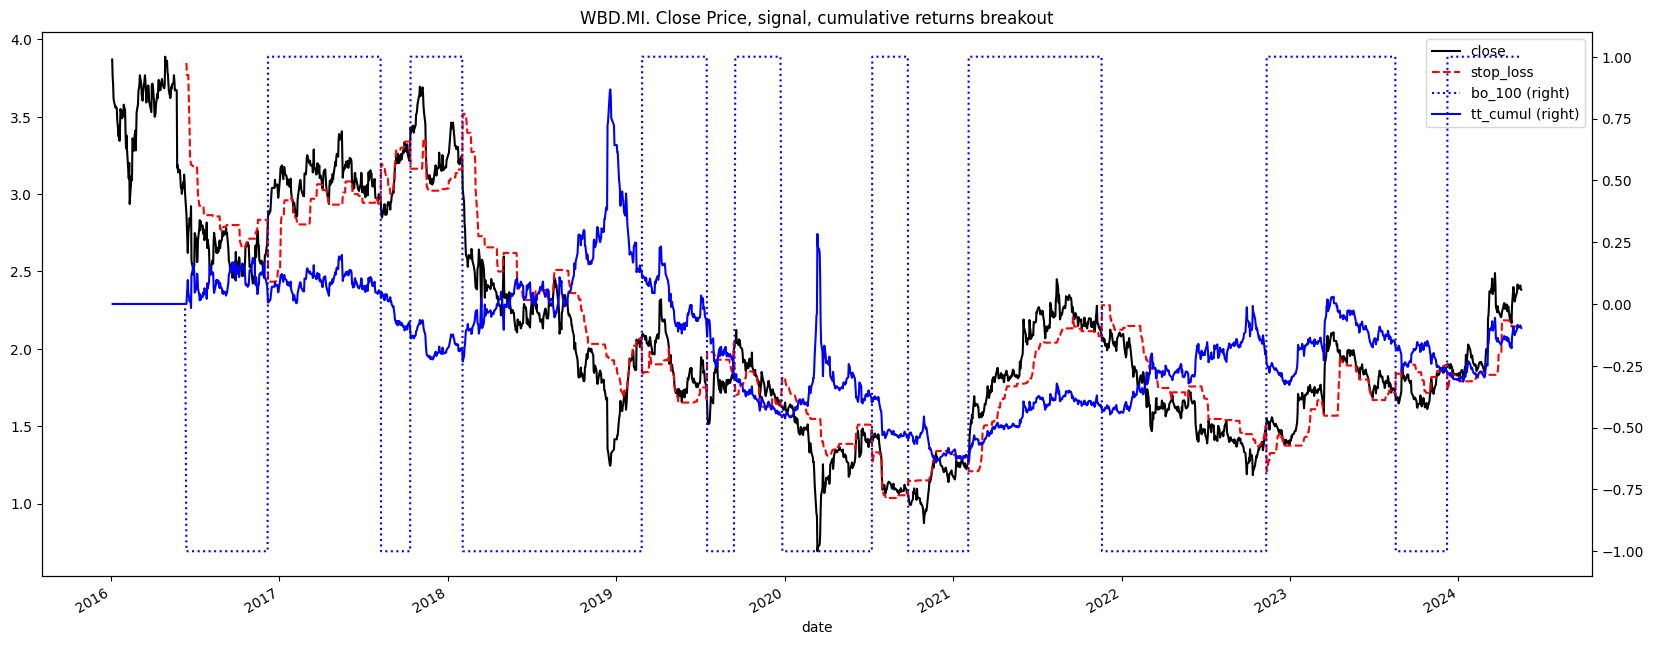

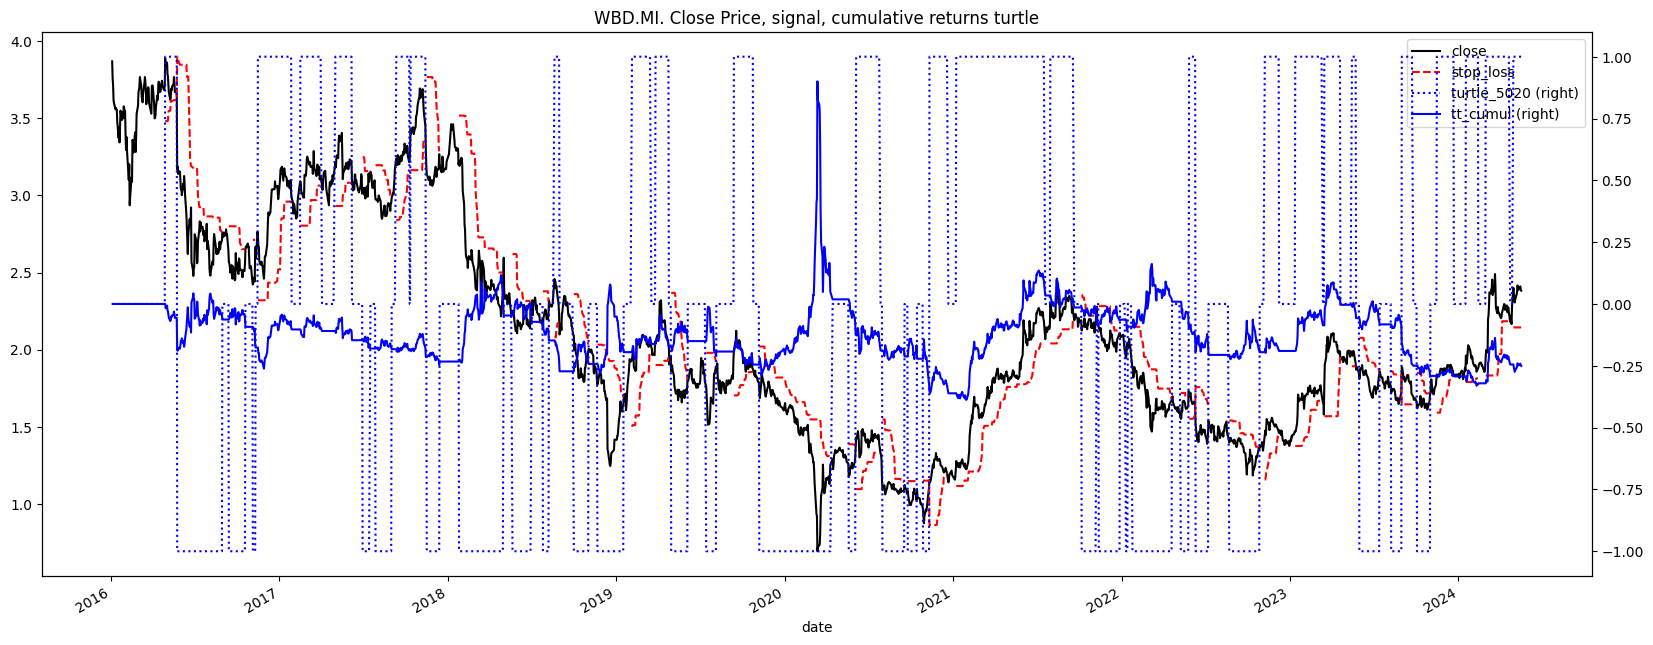

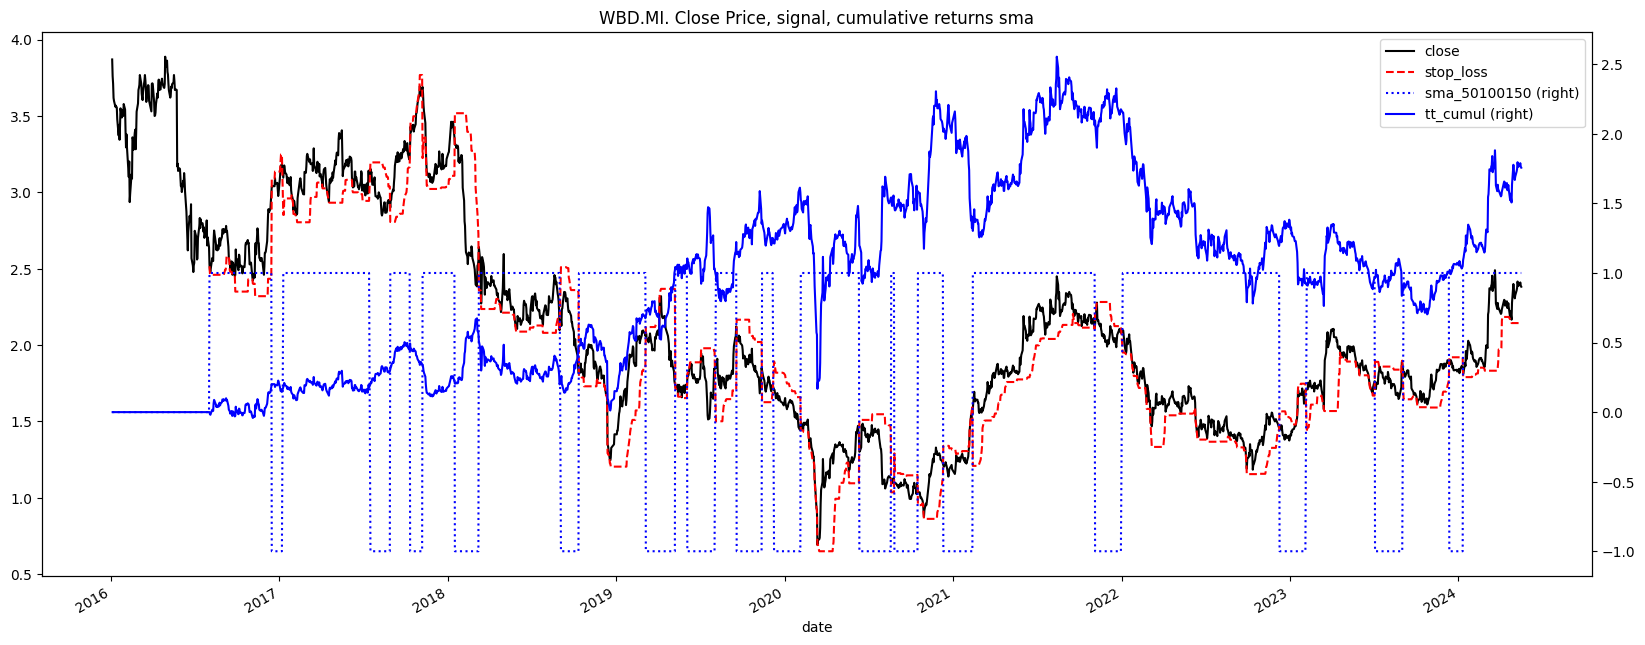

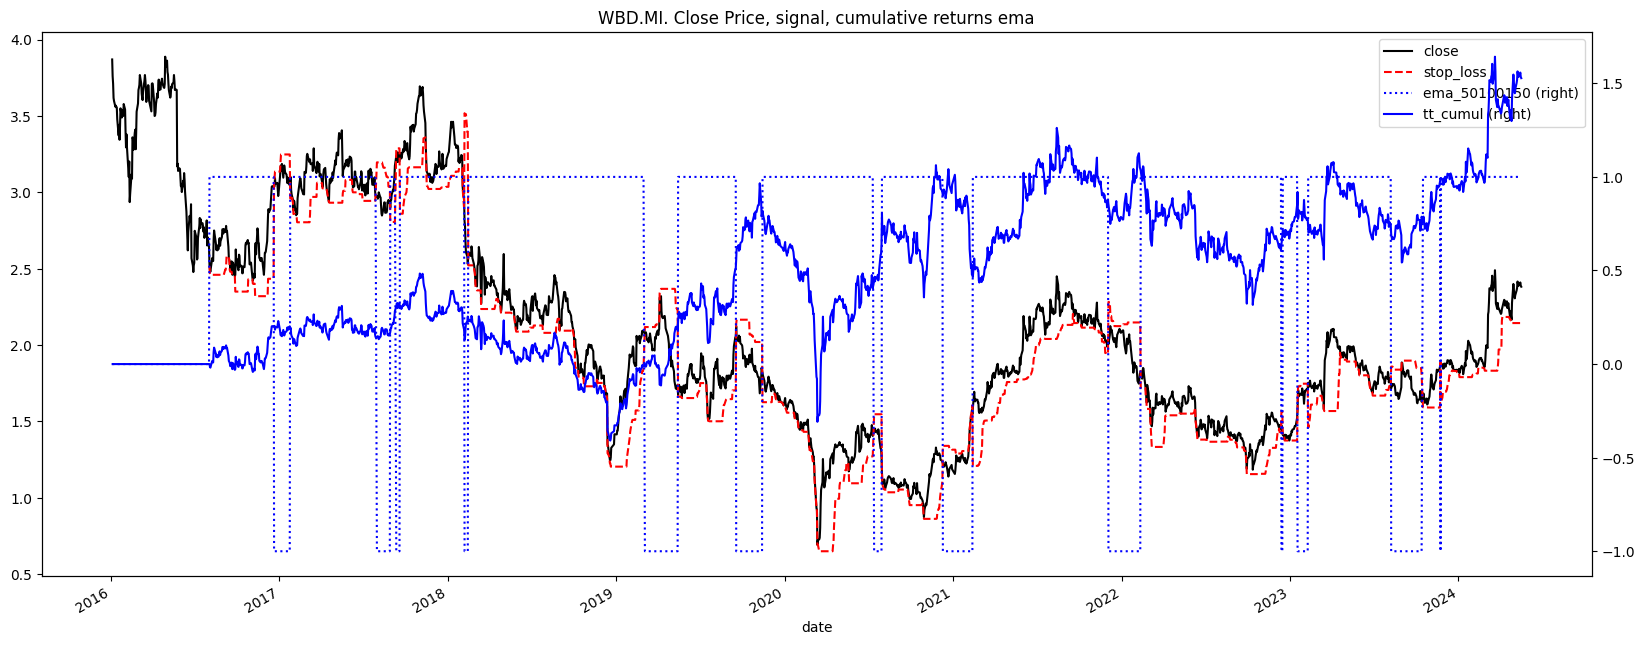

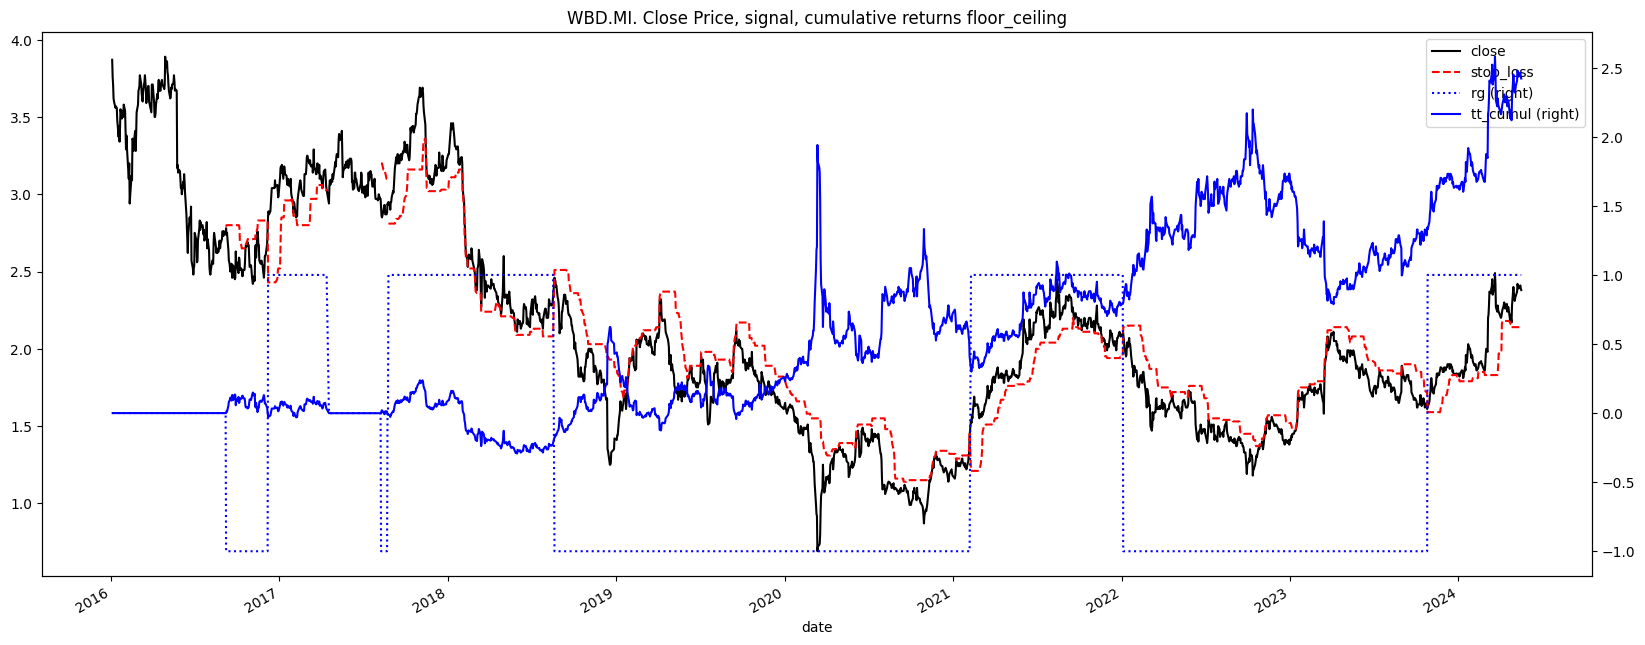

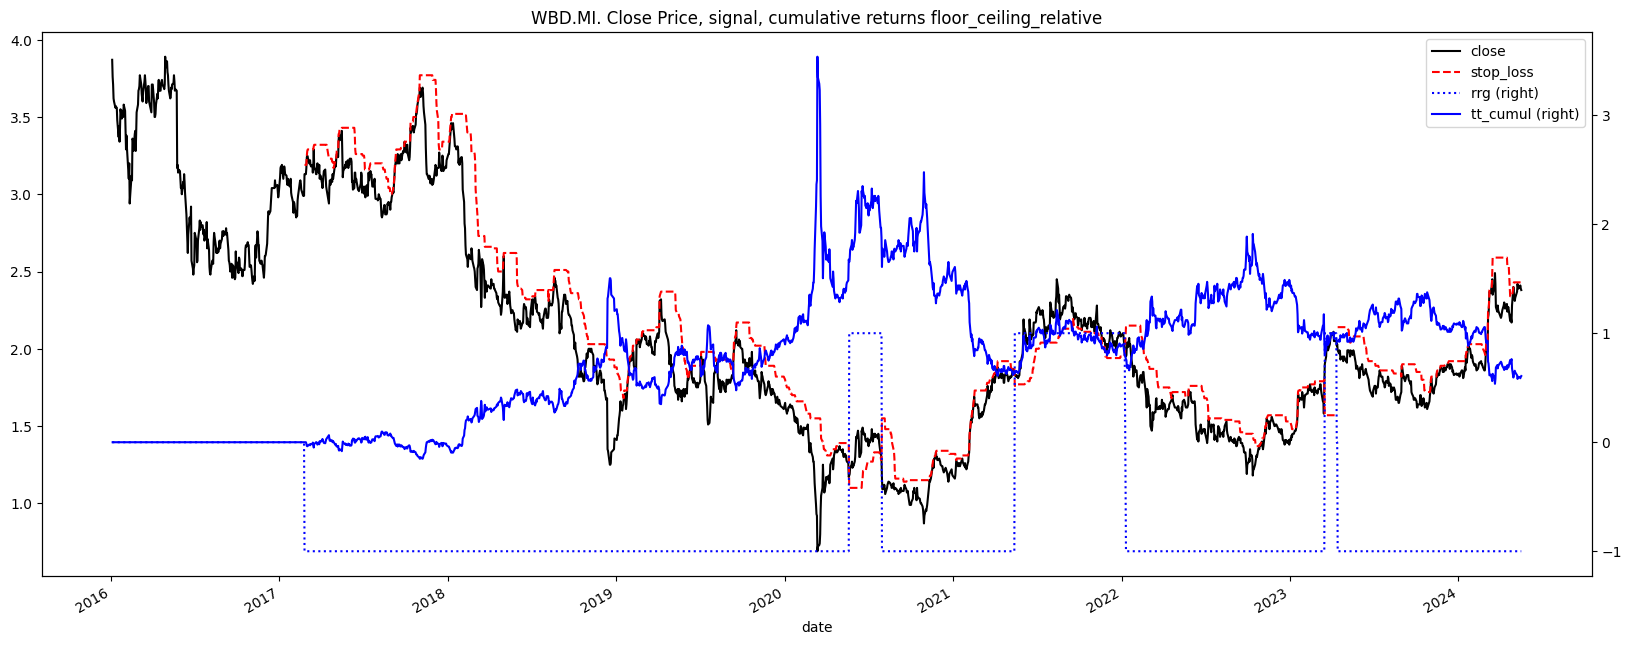

In [20]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_price_signal_cumreturns(df, ticker, s, m)

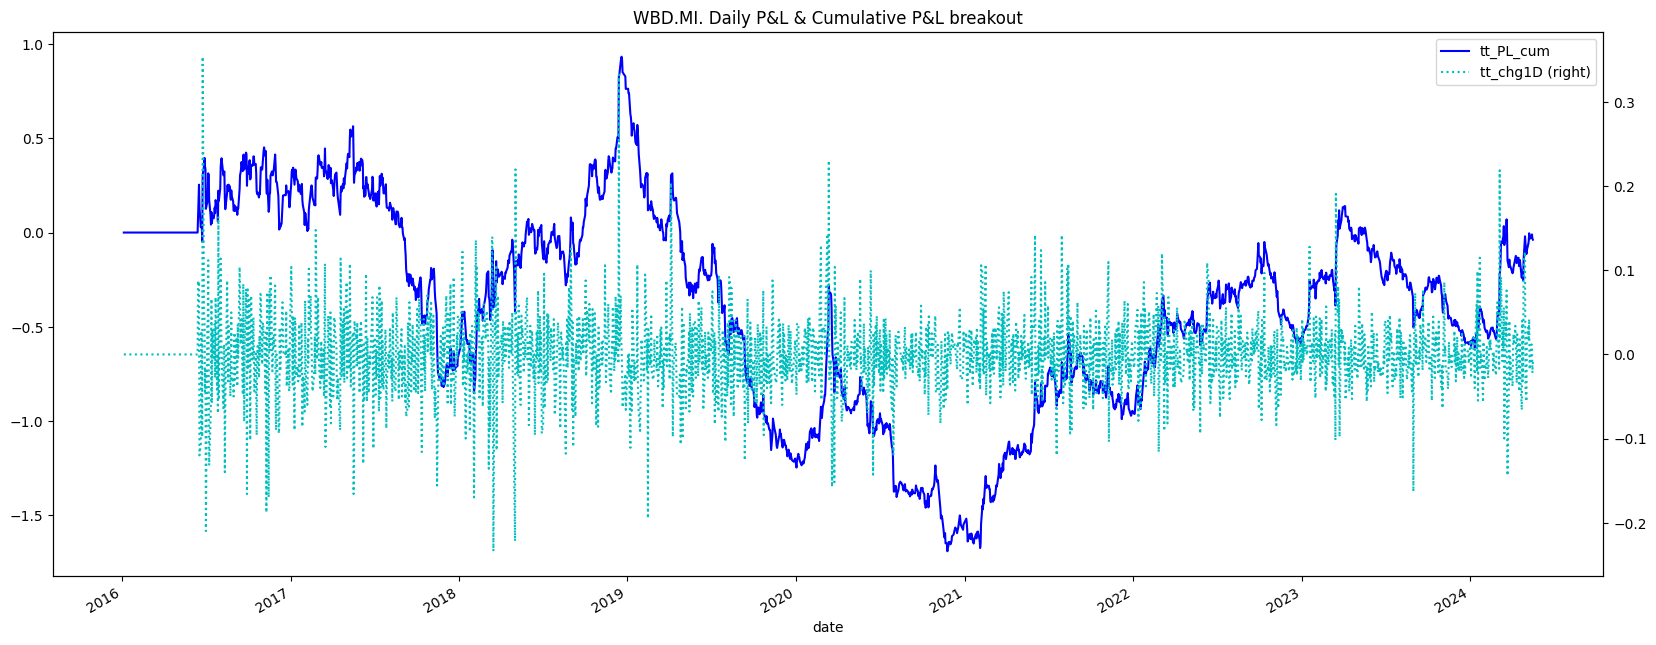

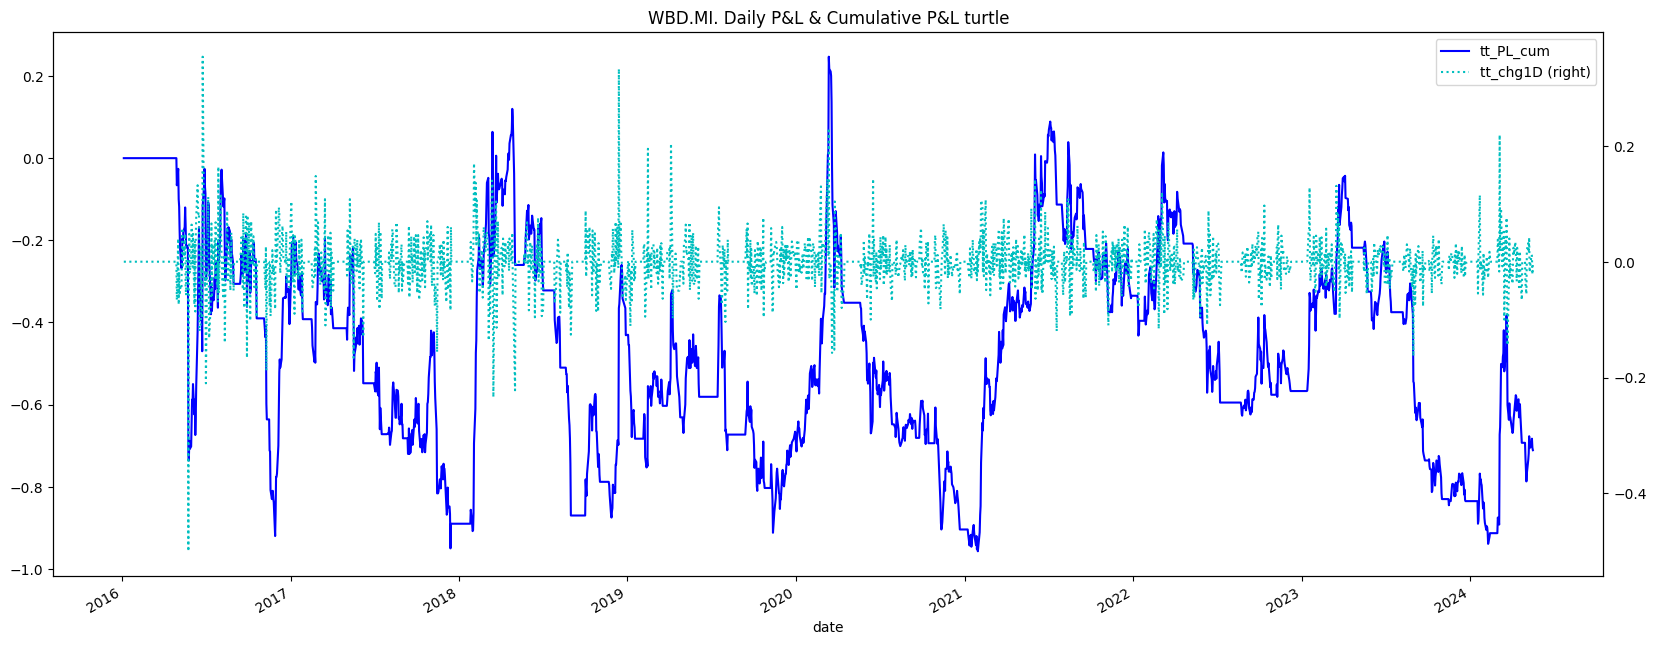

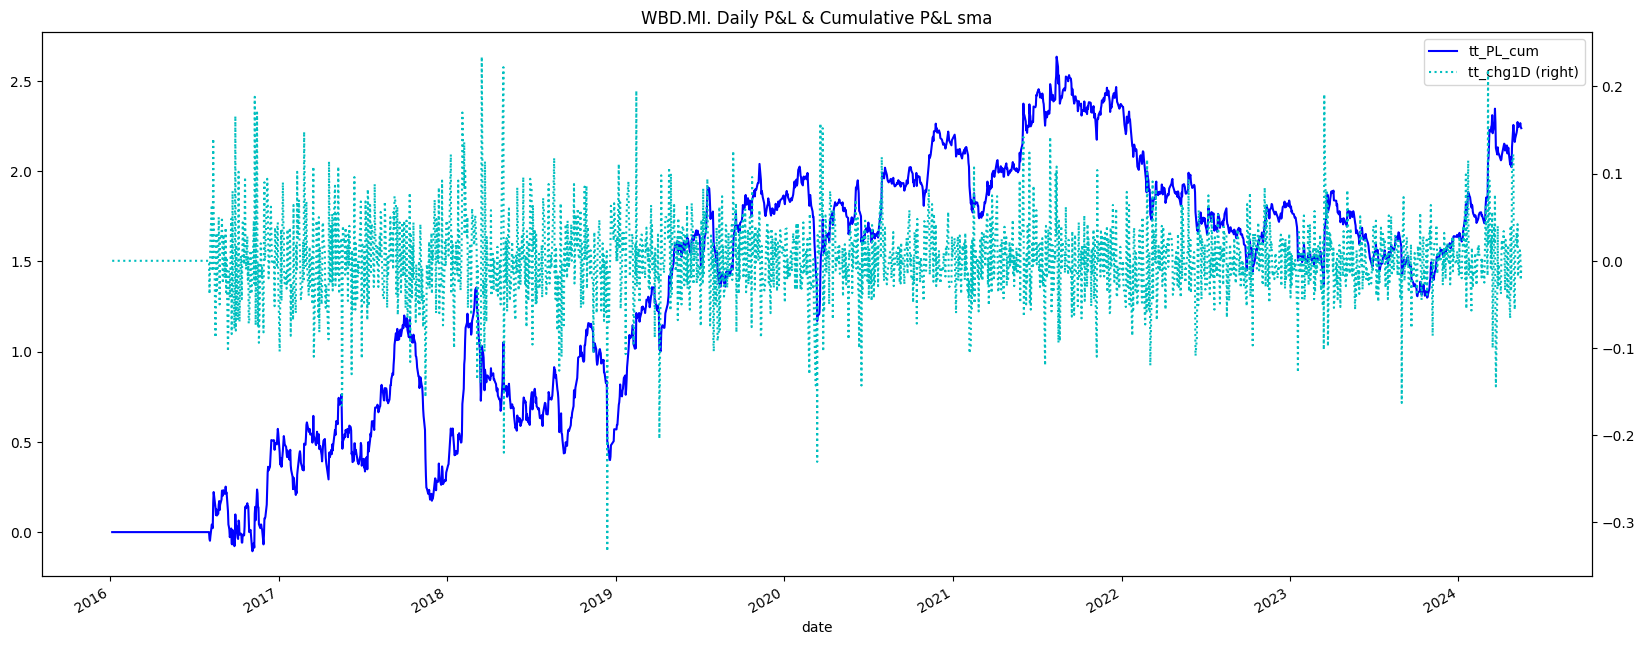

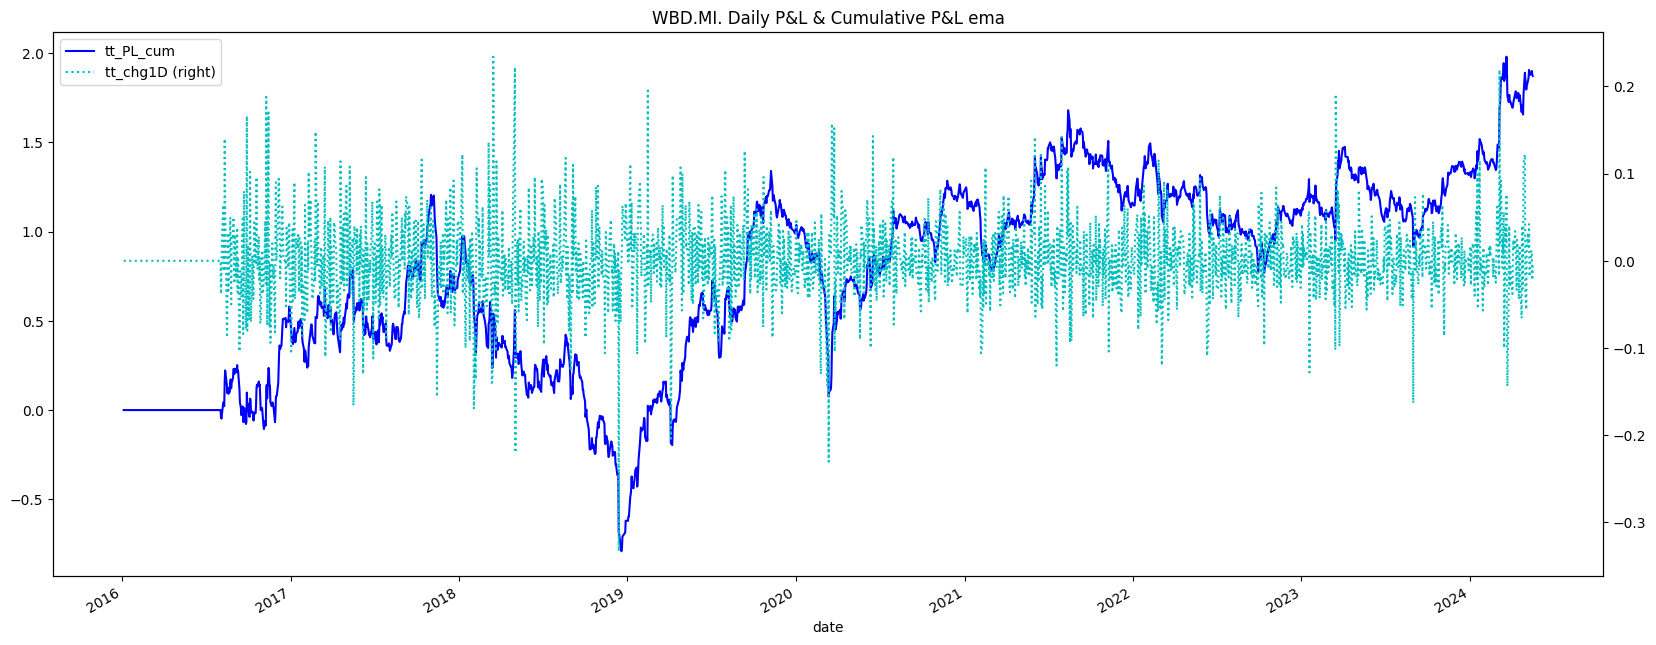

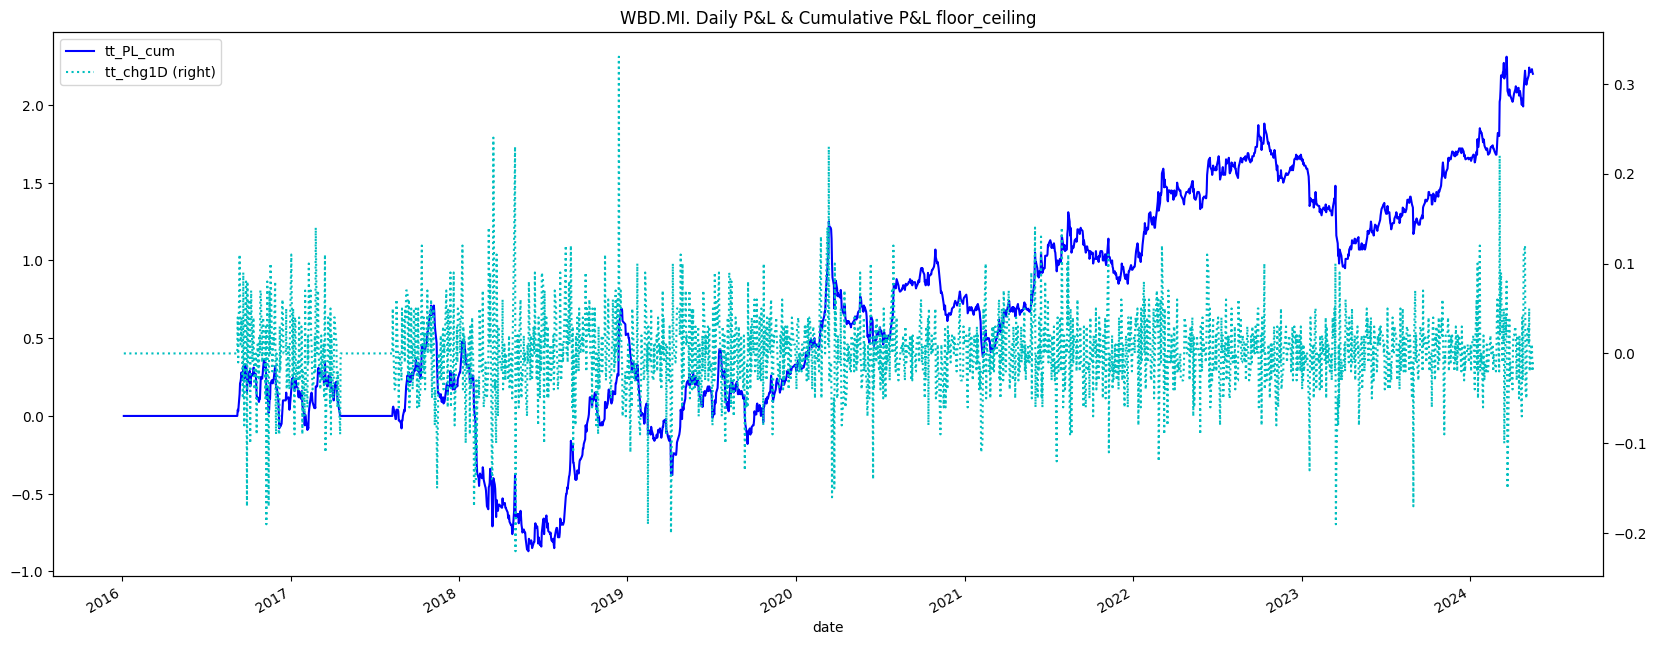

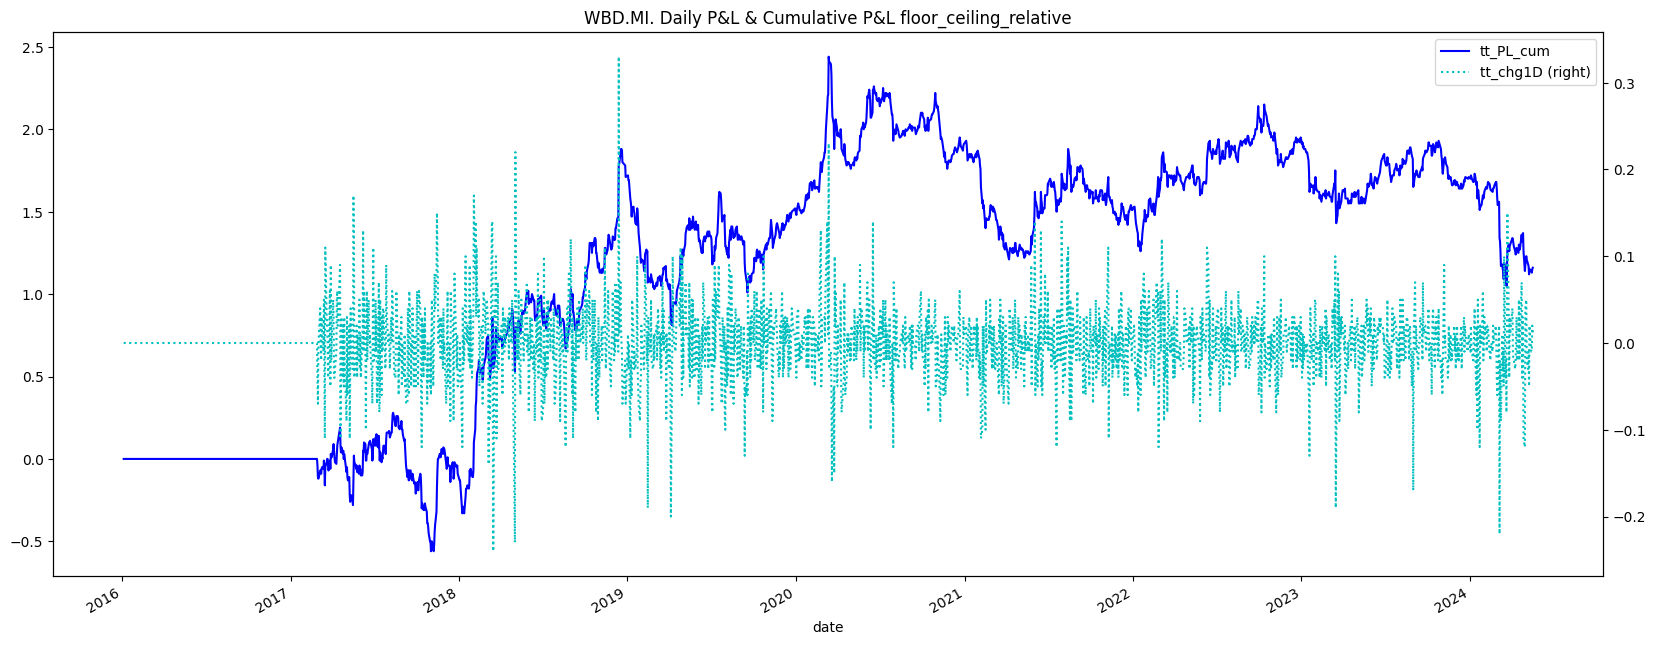

In [21]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_PL(df, ticker, m)

In [22]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'trading_edge','geometric_expectancy','kelly']]
output_df_sel.groupby('method').last() 

trading_edge  geometric_expectancy      kelly
method                                                               
breakout                    0.001811              0.001785  35.554977
ema                         0.001811              0.001785  35.554977
floor_ceiling               0.002238              0.002213  44.728634
floor_ceiling_relative     -0.000945             -0.000971 -18.897024
sma                         0.002389              0.002363  47.656285
turtle                      0.001821              0.001809  72.500618

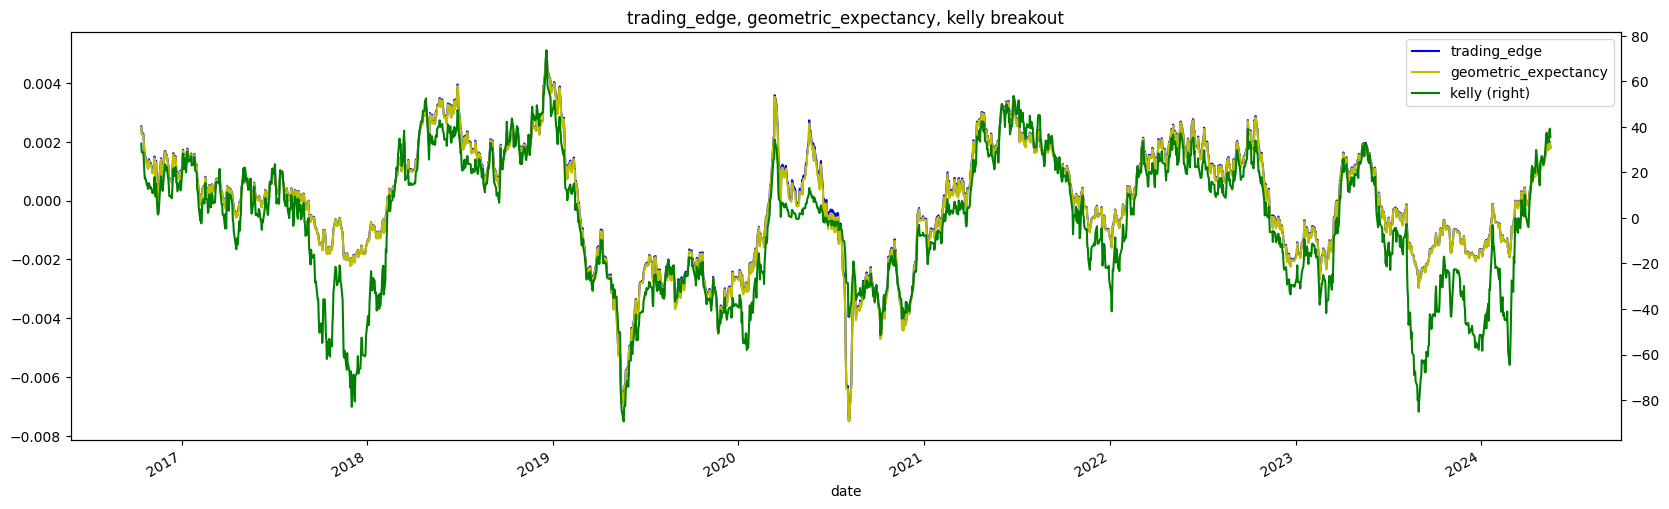

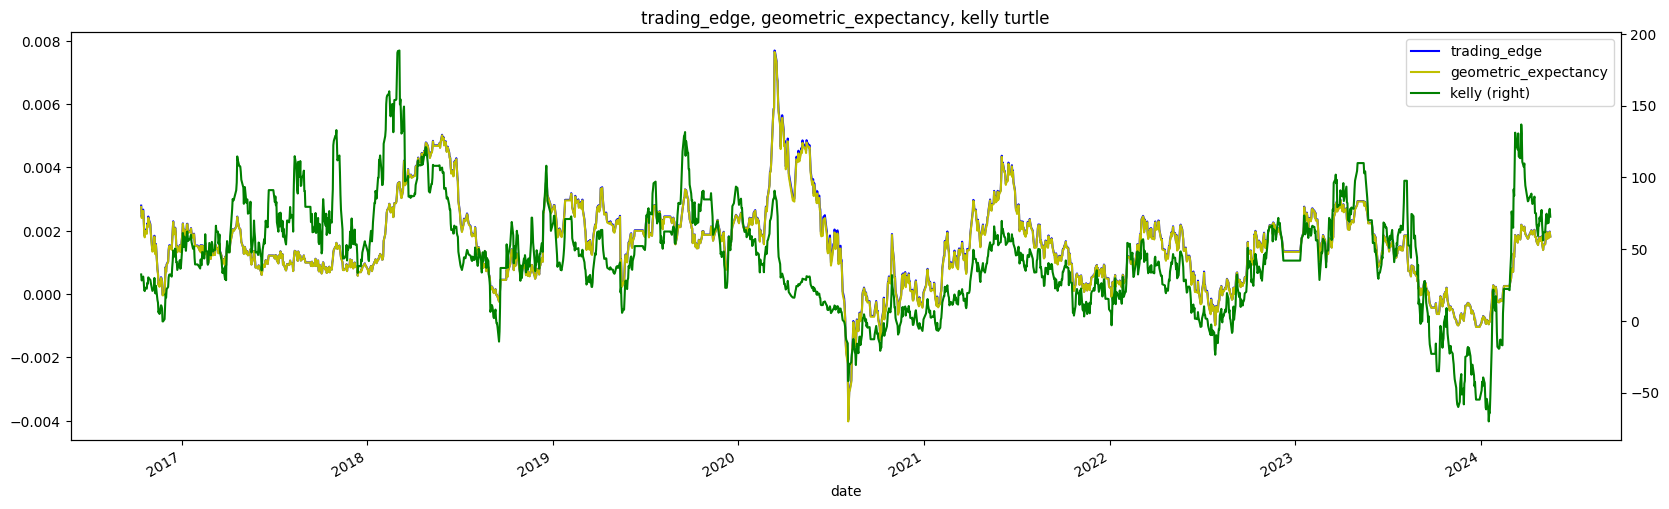

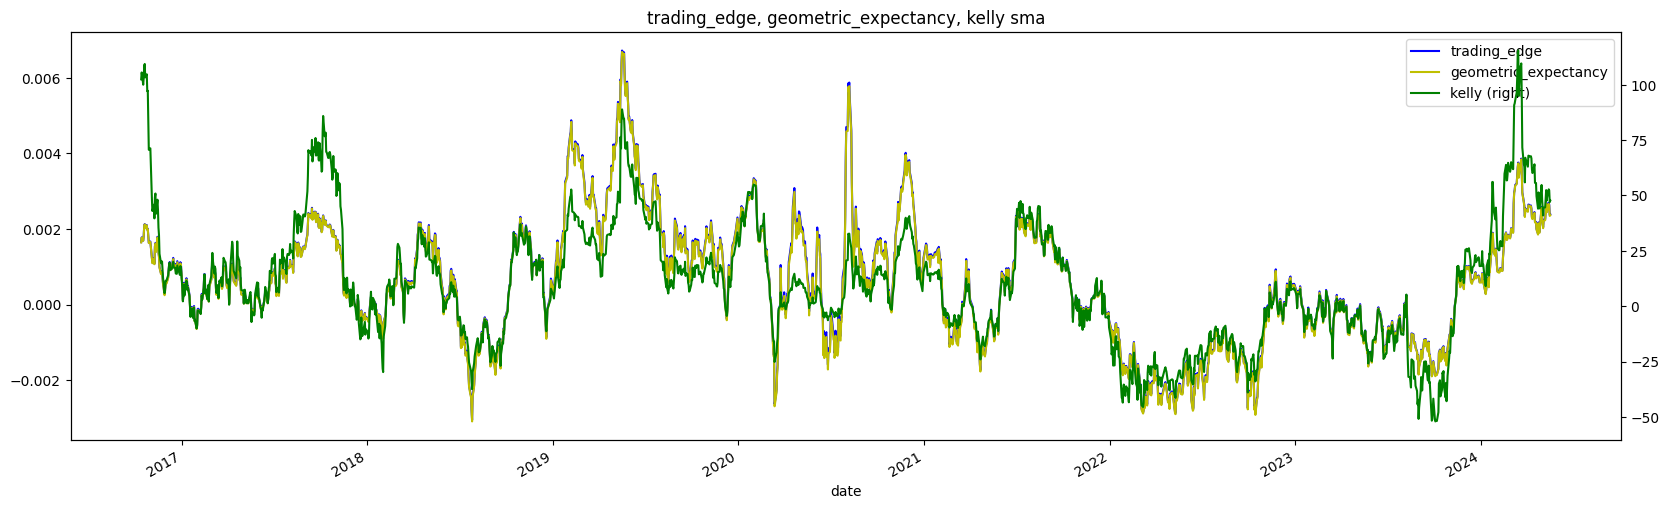

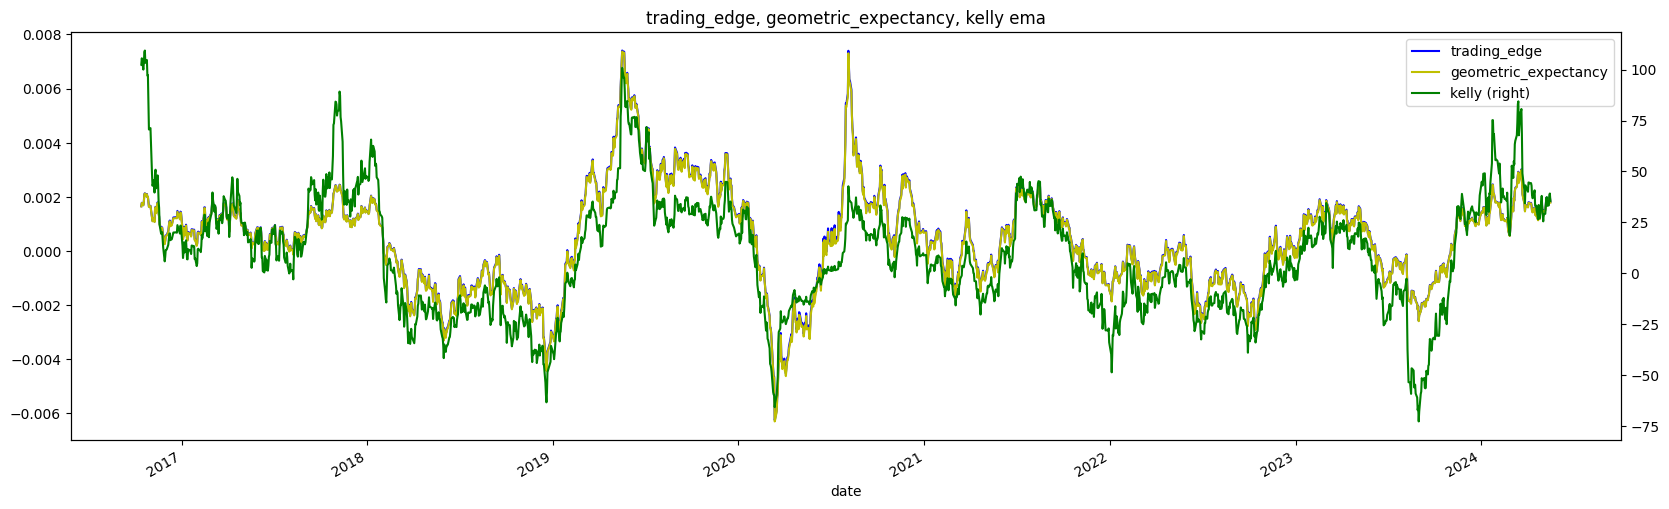

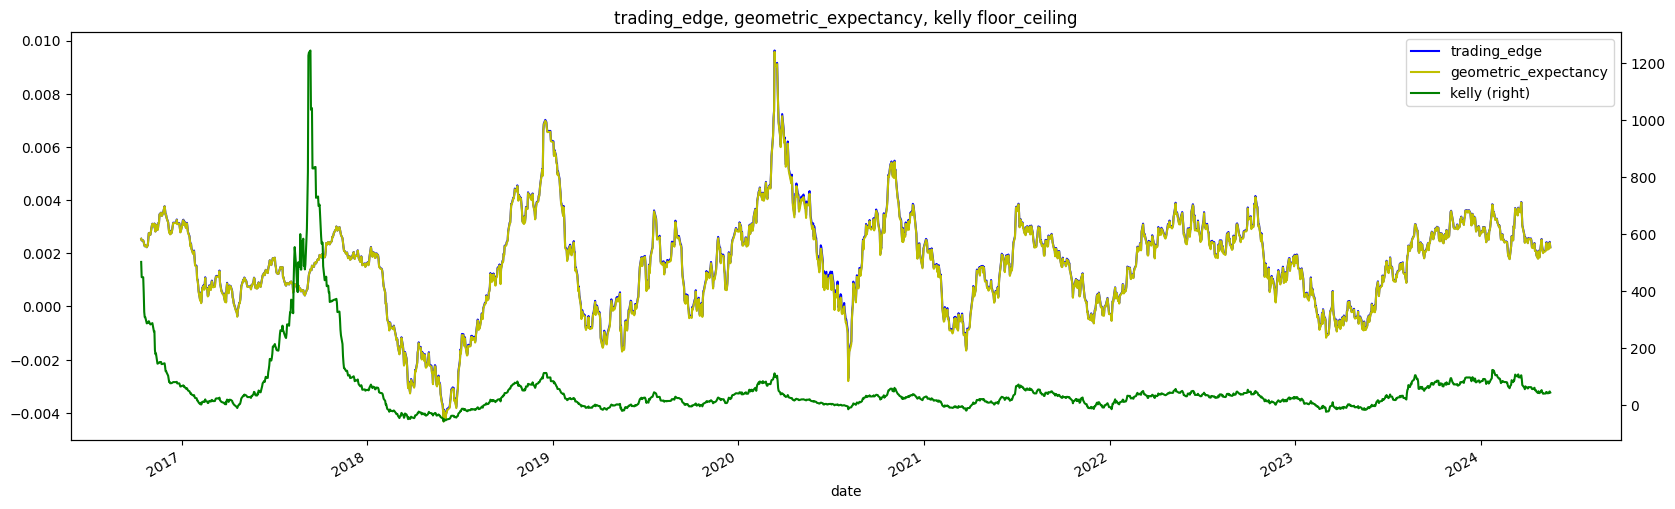

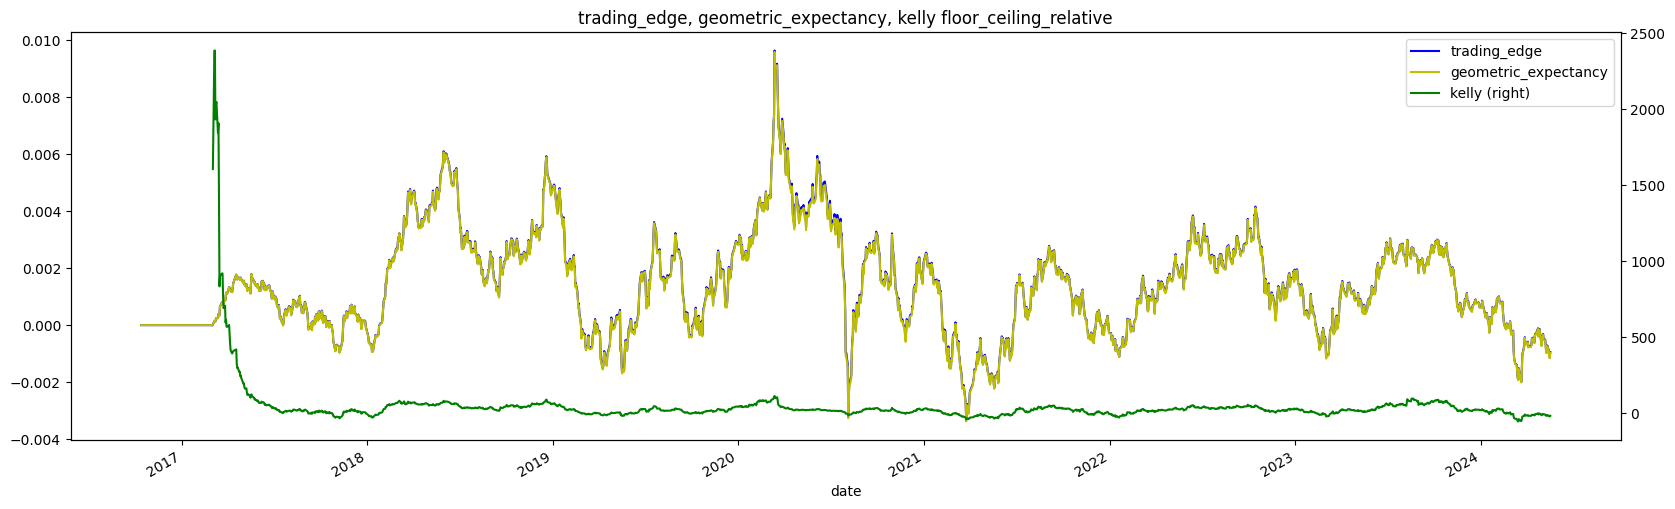

In [23]:
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_expectancies(df, window_exp, m)

In [24]:
starting_capital = 100000
lot = 100
mn = -0.0025
mx = -0.0075
# avg = (mn + mx) / 2
tolerance= -0.1
equal_weight = 0.05
span= 5
fx = 1

In [25]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_equity_risk(df, tolerance, mn, mx, span)  # call the function on the ith dataframe and signal  
    output_signals.append(output_df)  # append the output dataframe to the list  


In [26]:

for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    output_df = get_shares(df, starting_capital, lot, mn, mx, tolerance, equal_weight, span, fx, s)
    output_signals.append(output_df)  # append the output dataframe to the list  


In [27]:
output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'constant','concave','convex','equal_weight', 'tt_PL_cum_fx']]
output_df_sel.groupby('method').last() 

constant        concave         convex  \
method                                                                
breakout                100022.800064  100030.400085  100030.400085   
ema                     177875.149536  216812.724304  216812.724304   
floor_ceiling           107859.000000  109652.000000  104267.000000   
floor_ceiling_relative   88111.000000   81171.000000   81171.000000   
sma                     193100.796509  239651.194763  239651.194763   
turtle                  103936.799365  105564.999187  103809.299636   

                         equal_weight  tt_PL_cum_fx  
method                                               
breakout                 99935.399818     -0.038000  
ema                     103556.797695      1.871999  
floor_ceiling           103517.000000      2.200000  
floor_ceiling_relative  101350.000000      1.160000  
sma                     104252.199841      2.238000  
turtle                   98740.202314     -0.710999

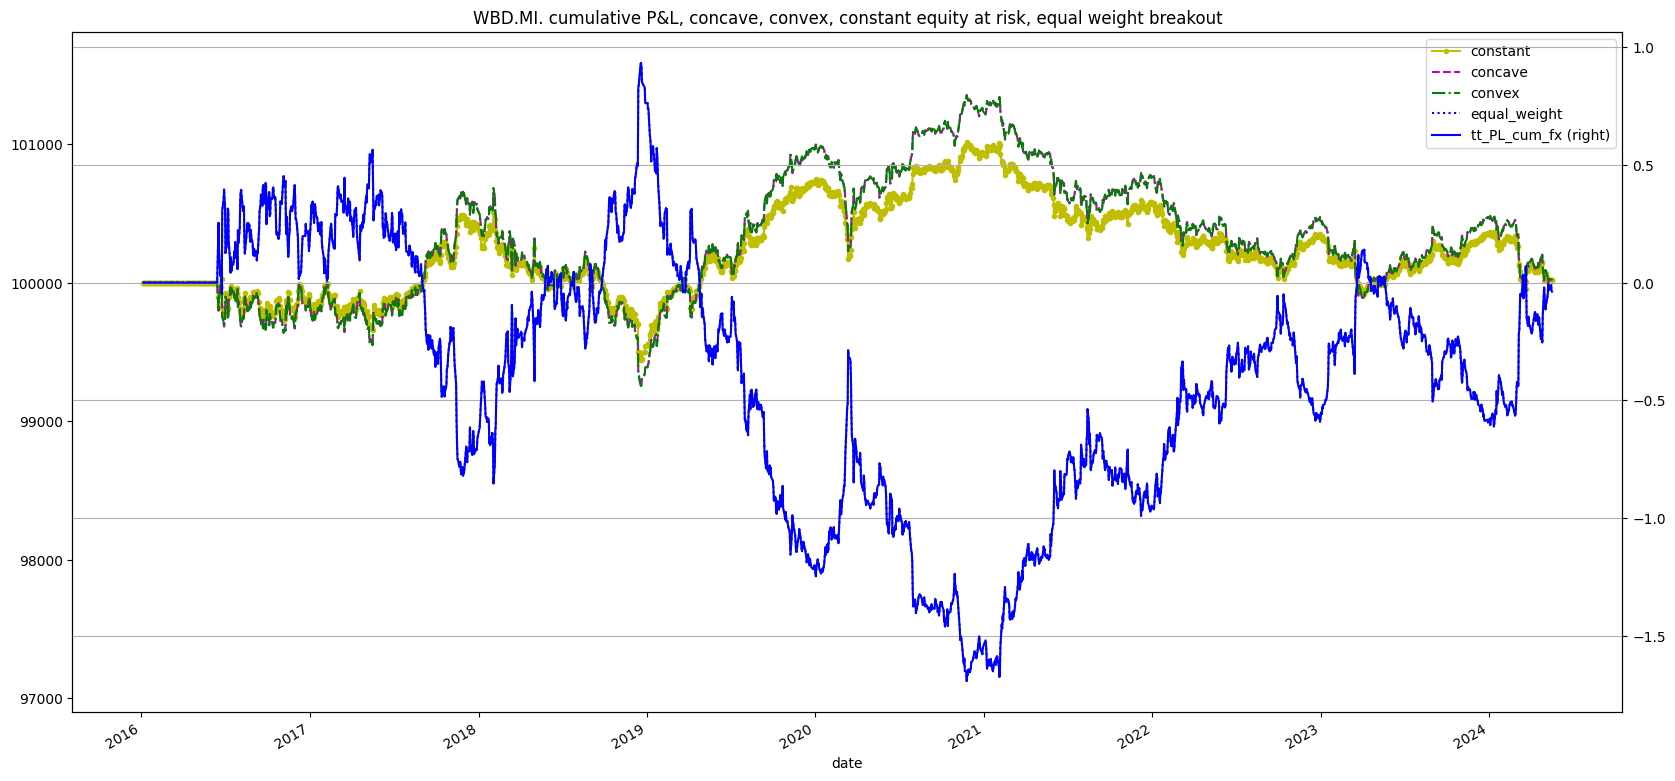

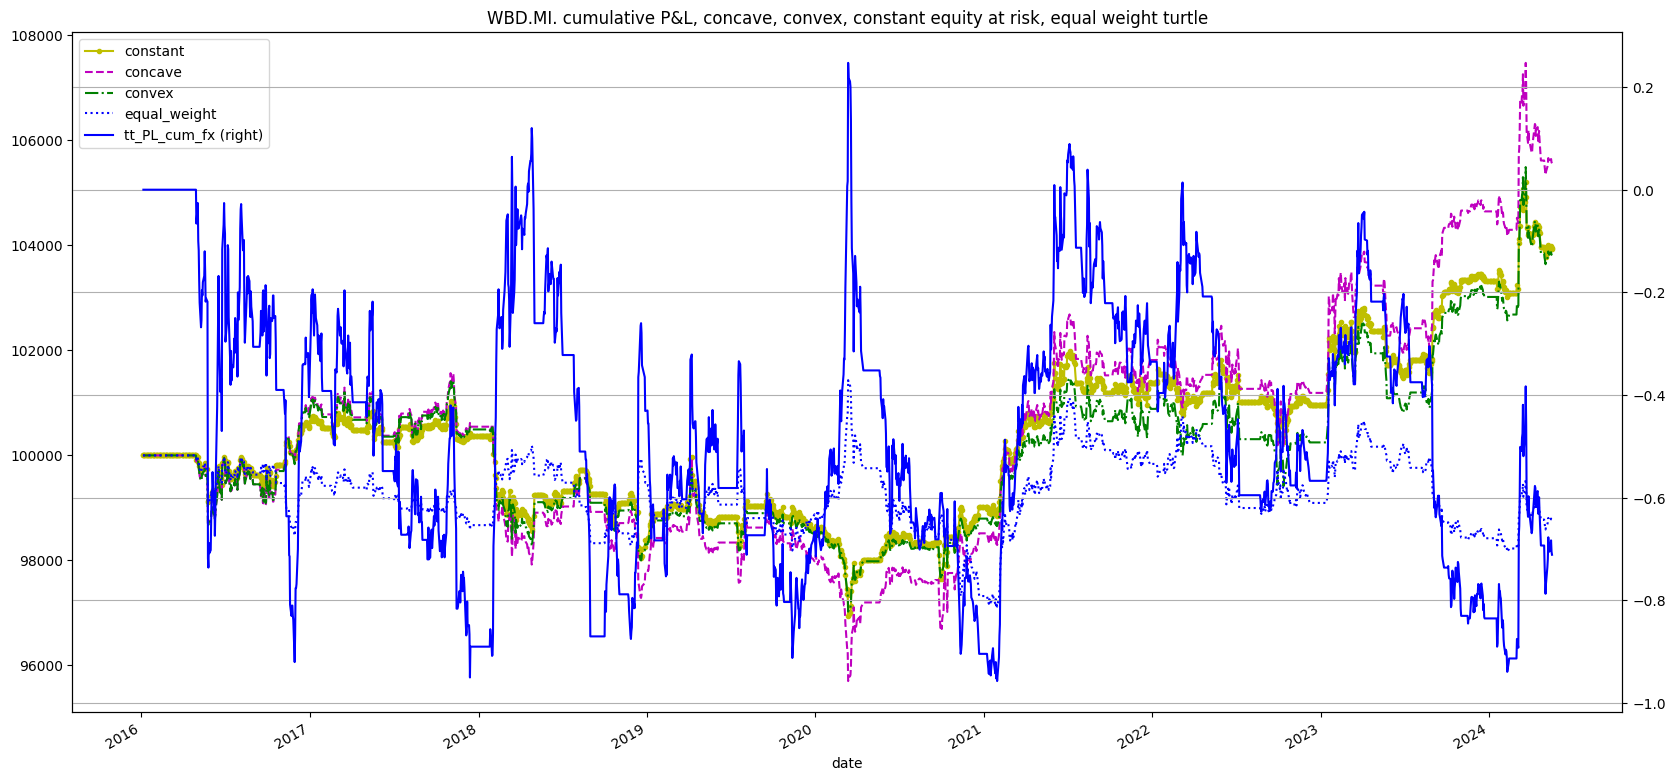

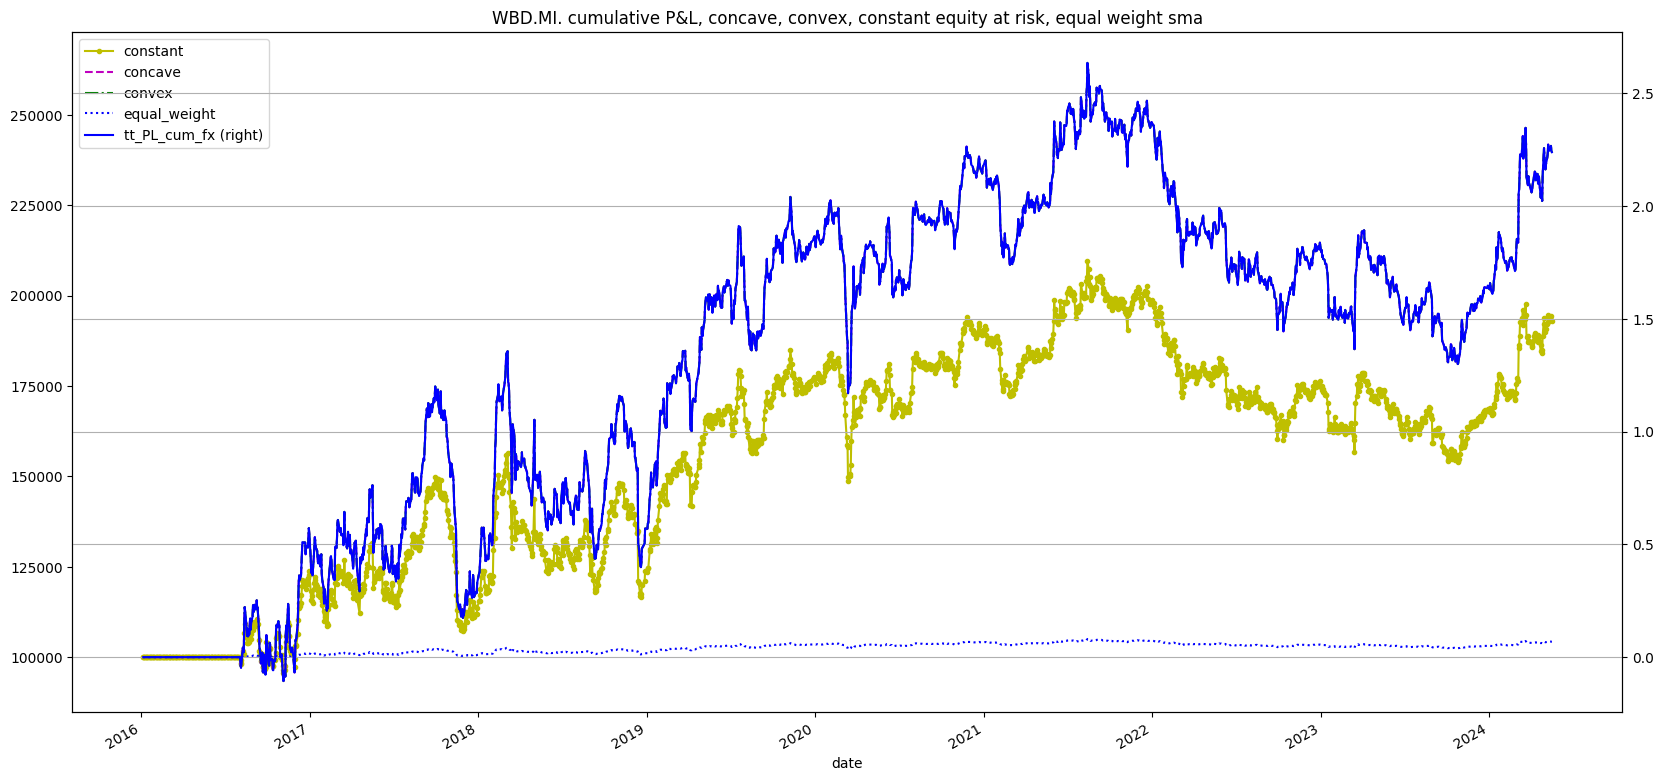

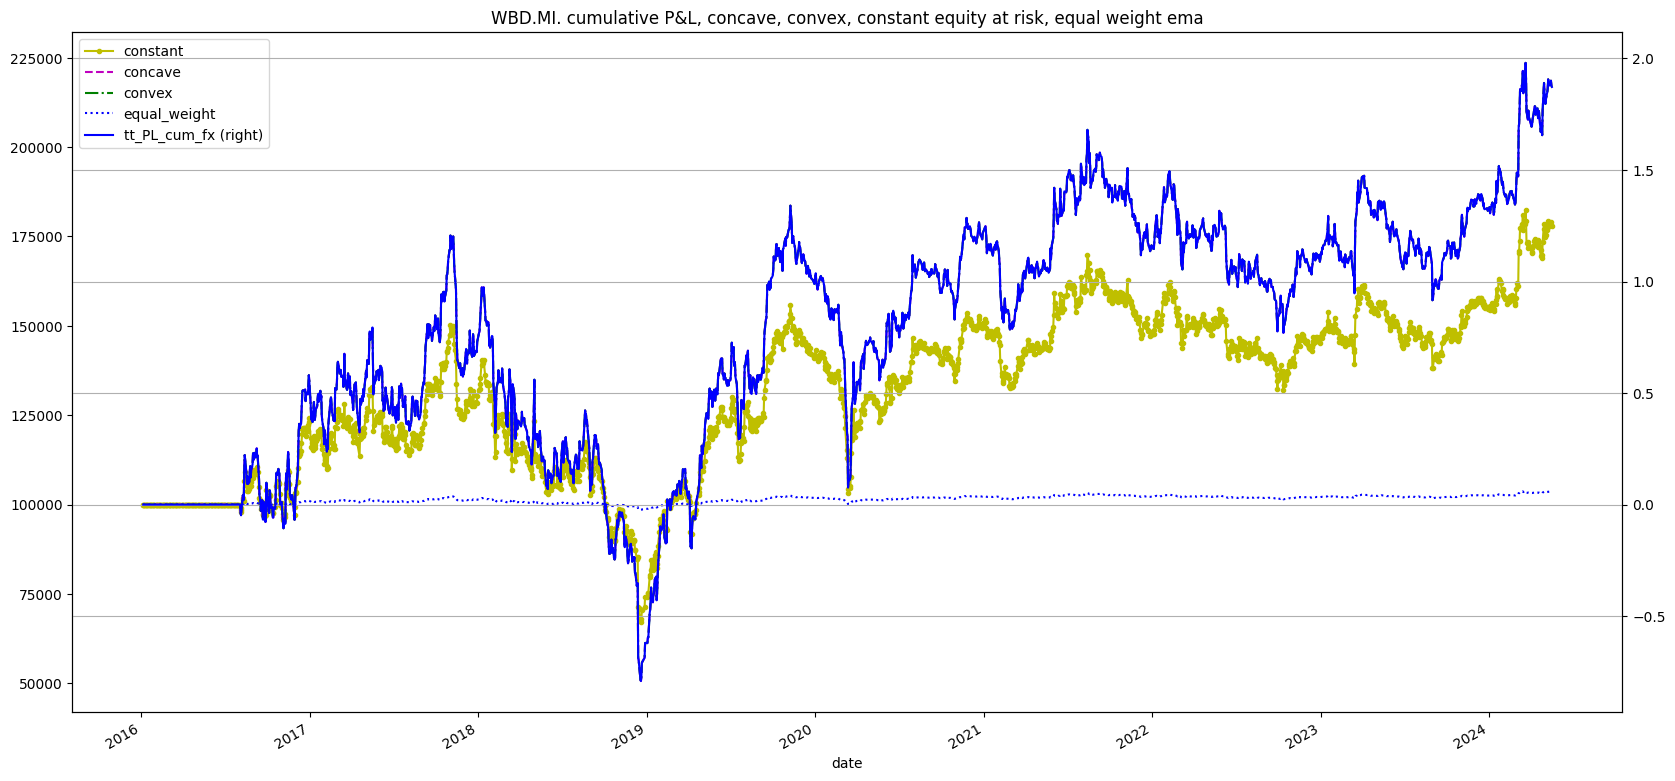

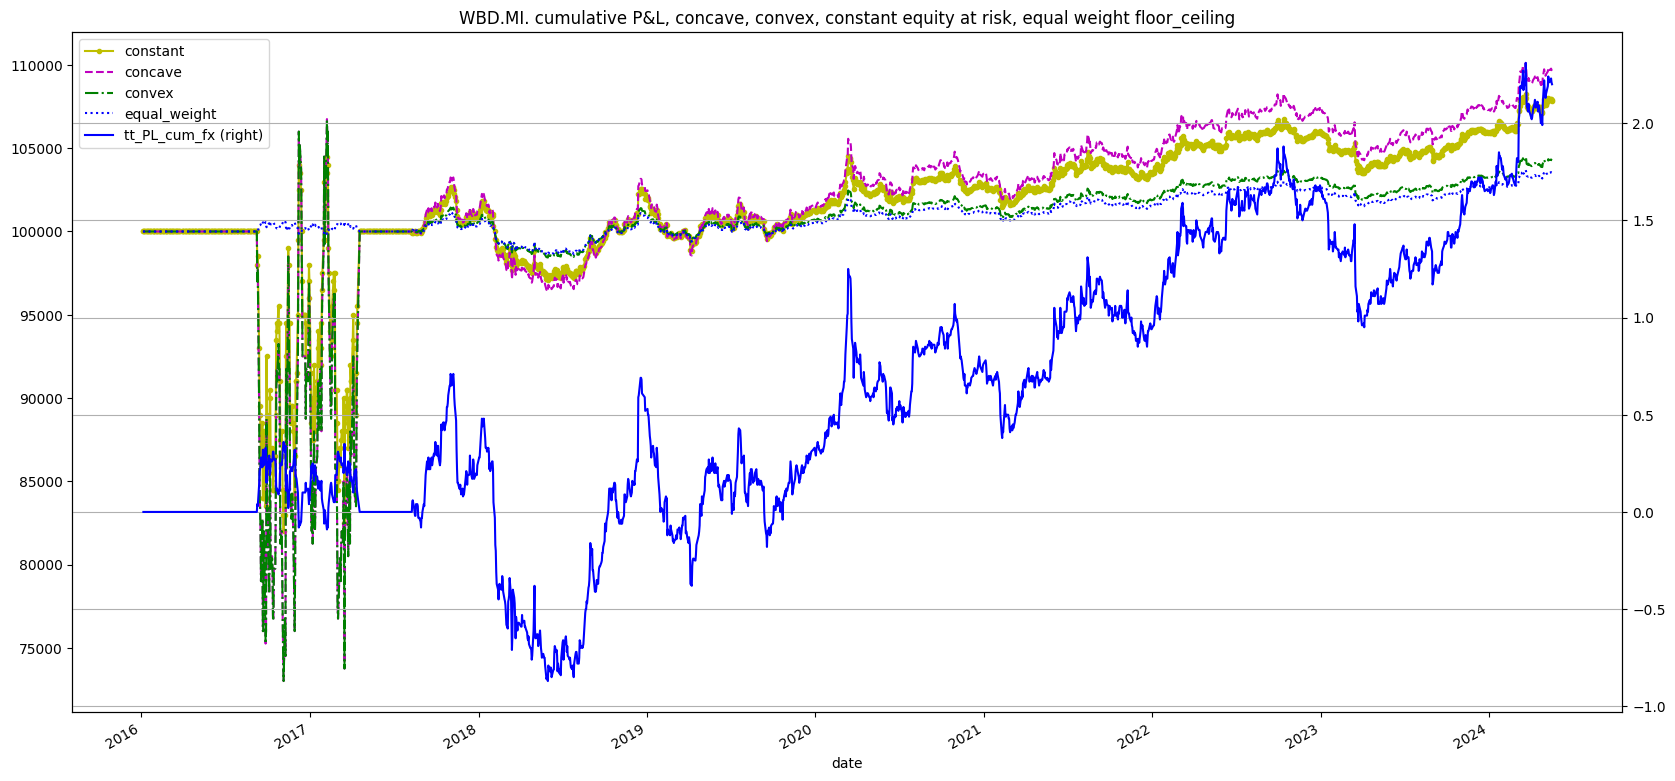

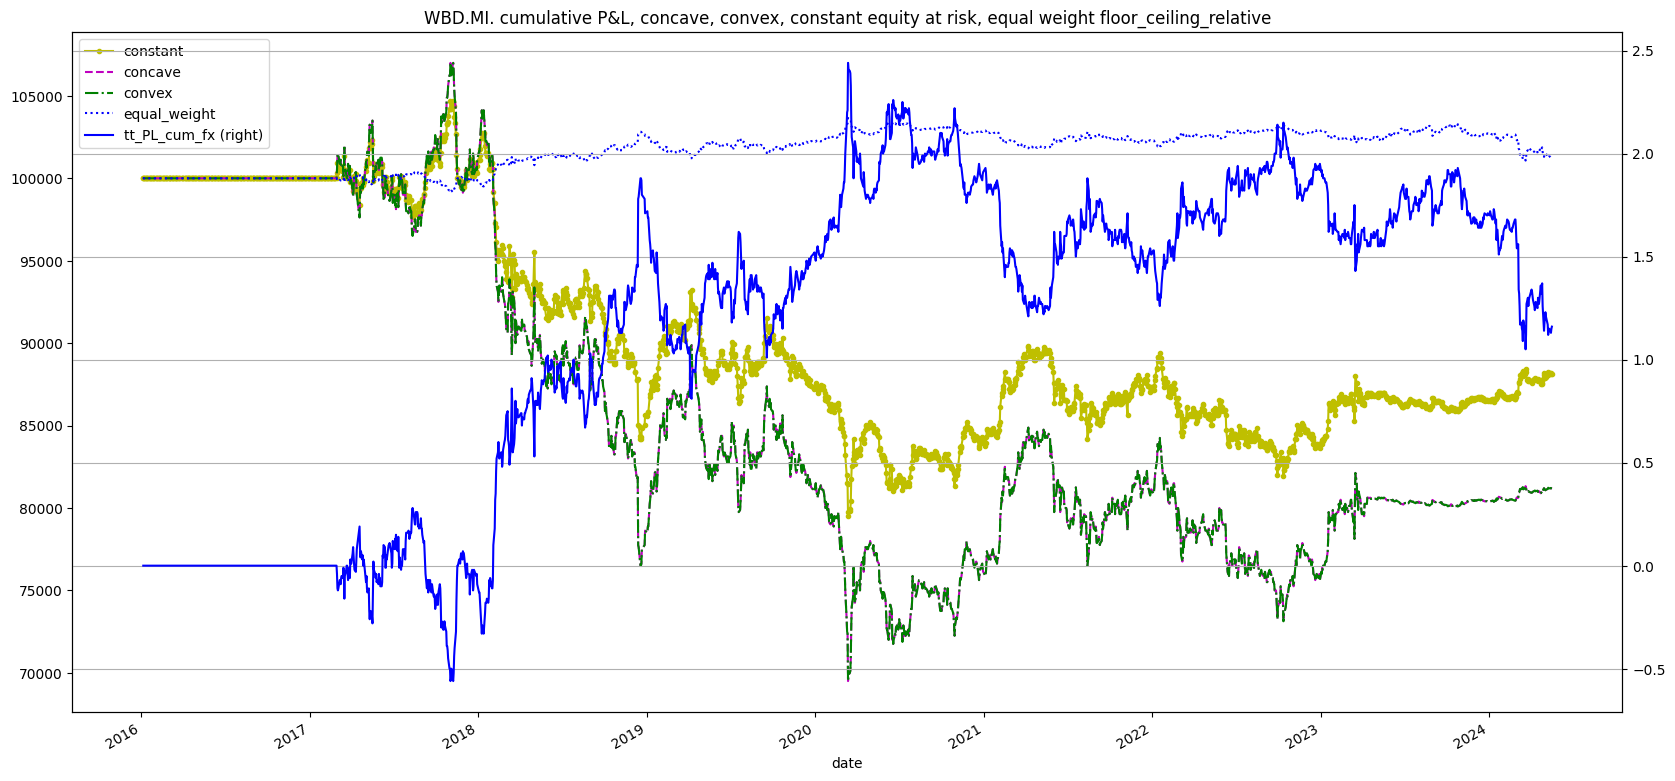

In [28]:
for i in range(len(signal)):  
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    # print(df.tail())
    plot_equity_amount(df, ticker, m)

In [29]:
# # determining the name of the file
# file_name = 'A2A_unt.xlsx'
 
# # saving the excel
# df.to_excel(file_name)

output_df_sel = pd.concat(output_signals, axis=0)  
output_df_sel = output_df_sel[['method', 'shs_eql','shs_fxd','shs_ccv','shs_cvx']]
output_df_sel.groupby('method').last() 

shs_eql  shs_fxd  shs_ccv  shs_cvx
method                                                    
breakout                -2000.0   -600.0   -800.0   -800.0
ema                     -2100.0  41600.0  62400.0  62400.0
floor_ceiling           -2100.0   3500.0   4300.0   1900.0
floor_ceiling_relative  -2100.0  -2900.0  -1400.0  -1400.0
sma                     -2100.0  41600.0  62400.0  62400.0
turtle                  -2000.0   2000.0   2900.0   2200.0

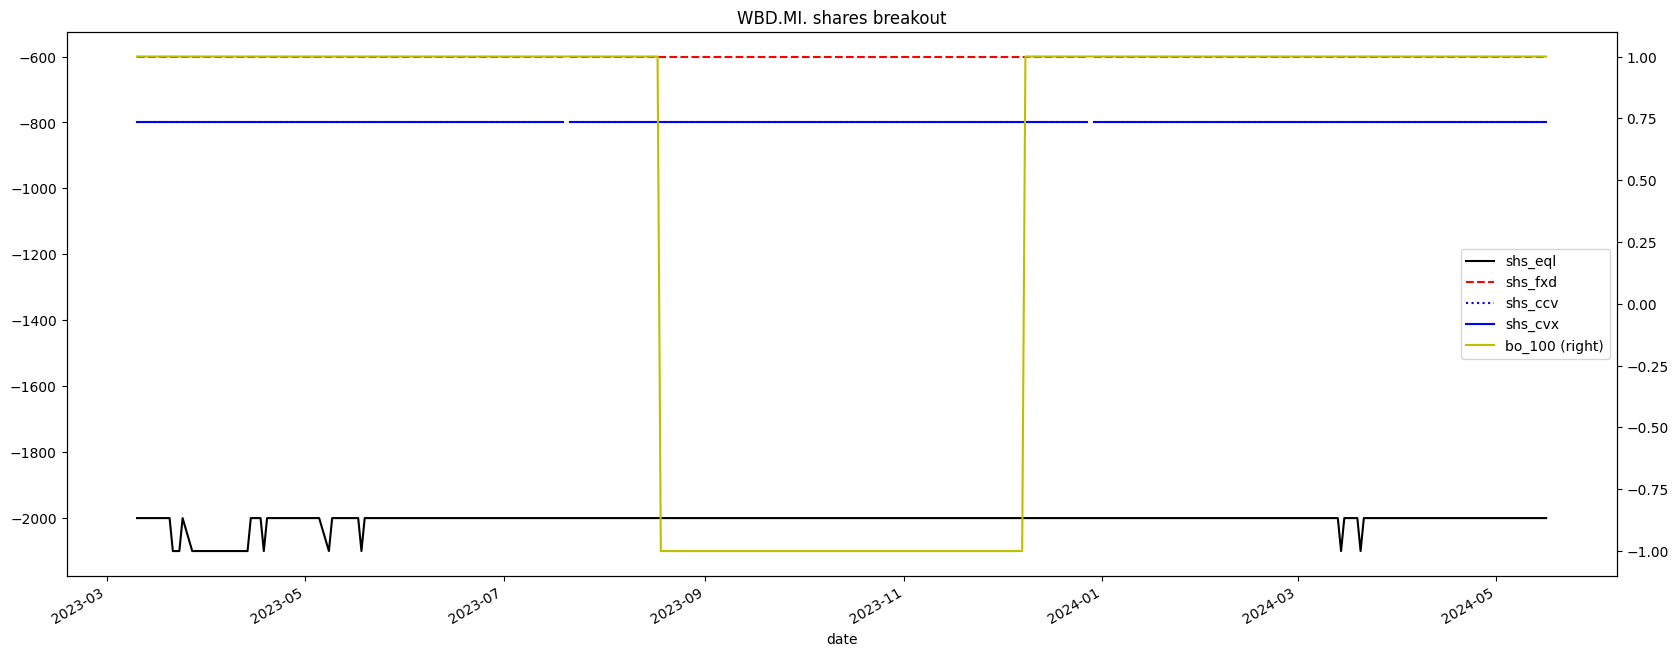

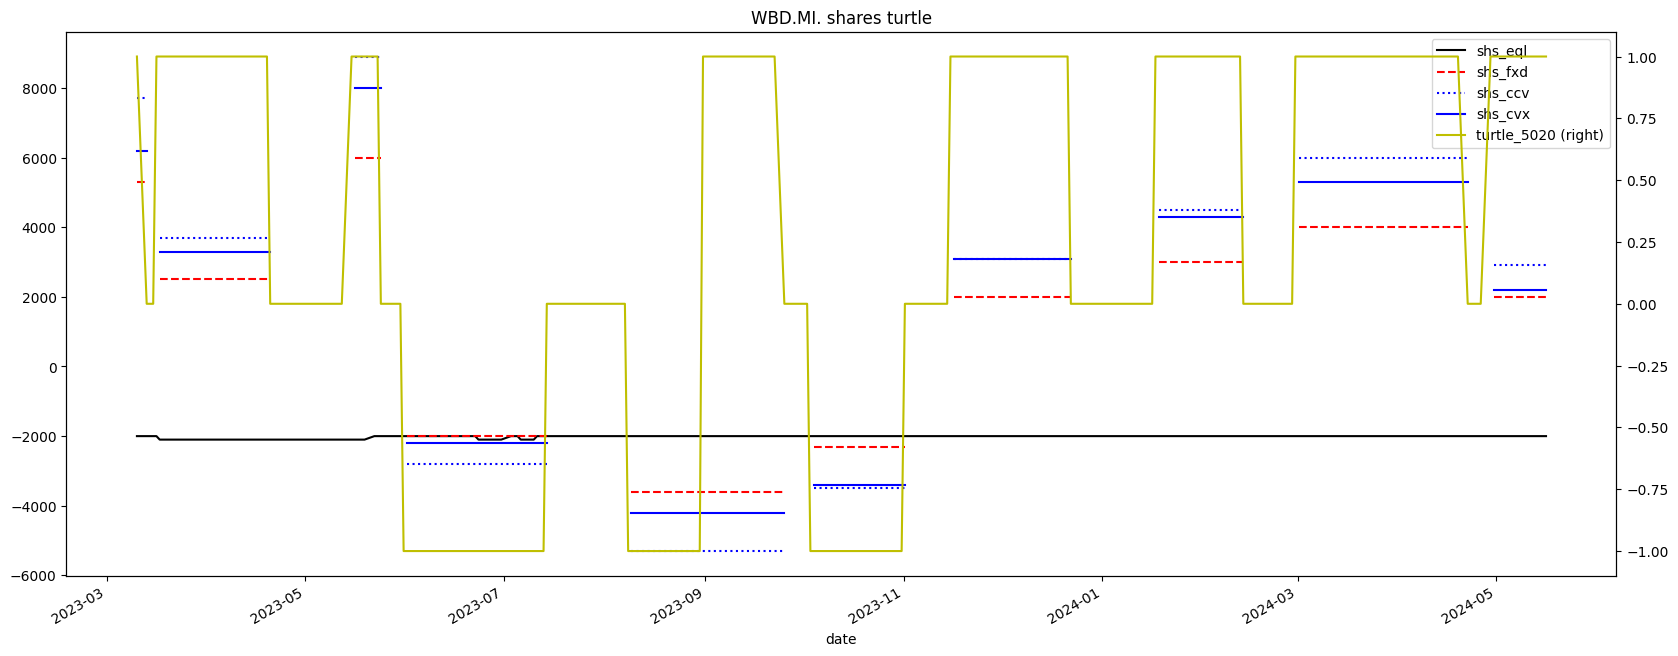

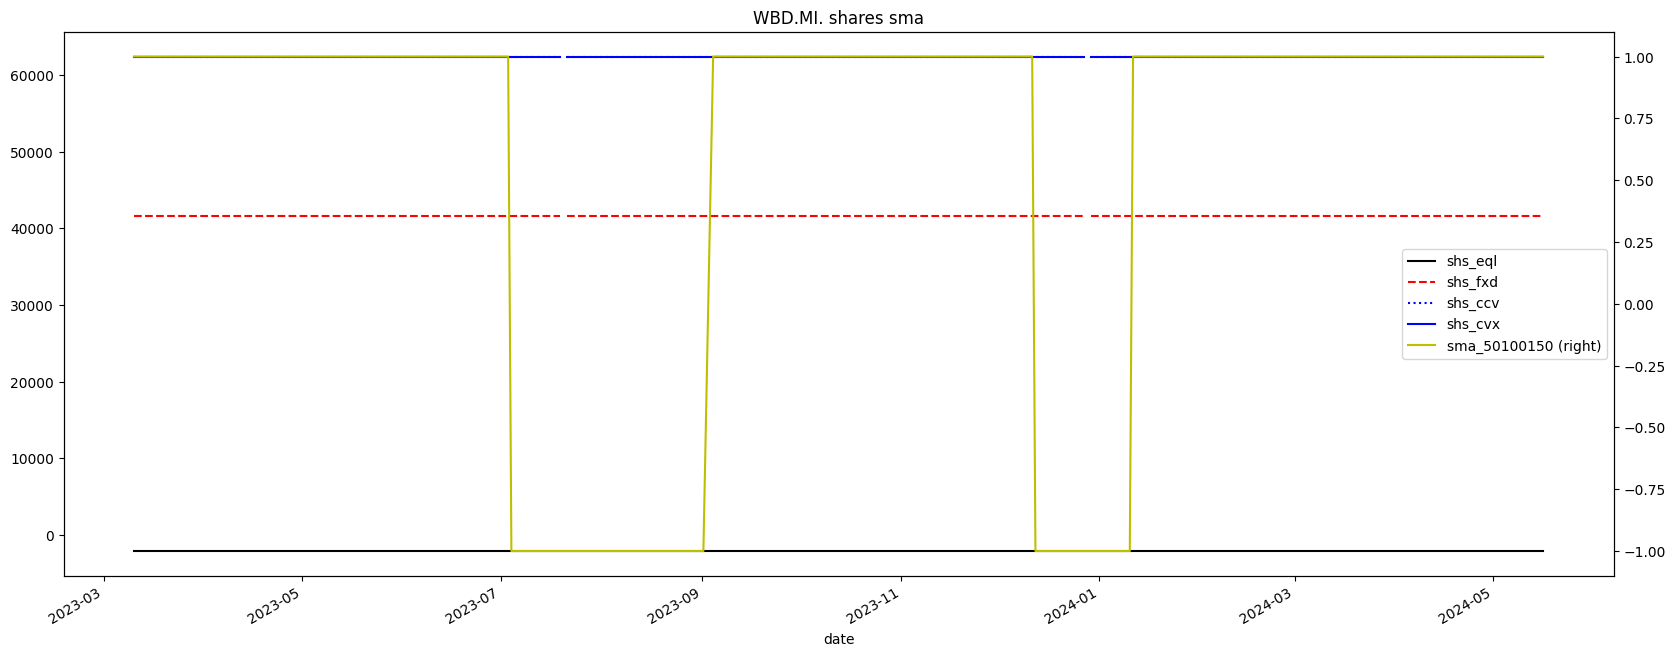

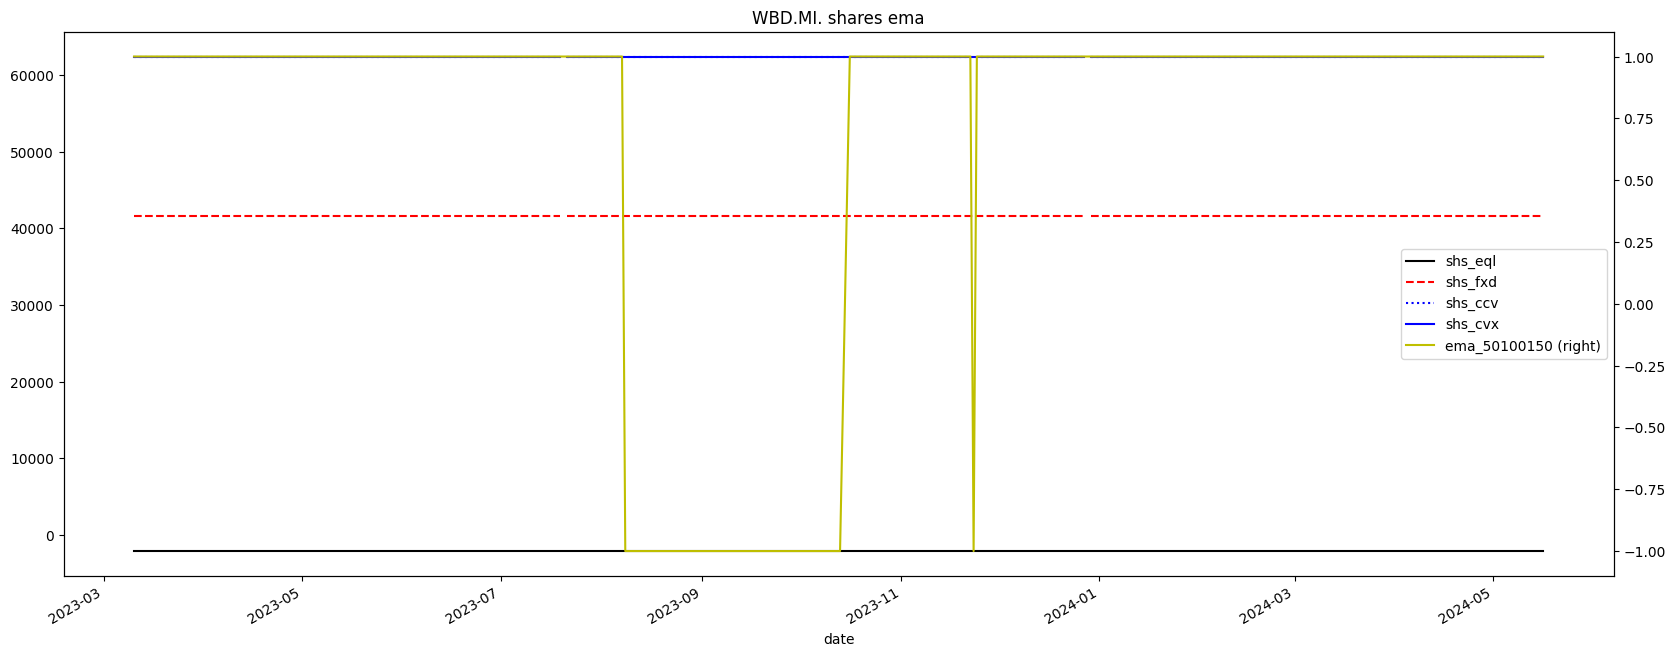

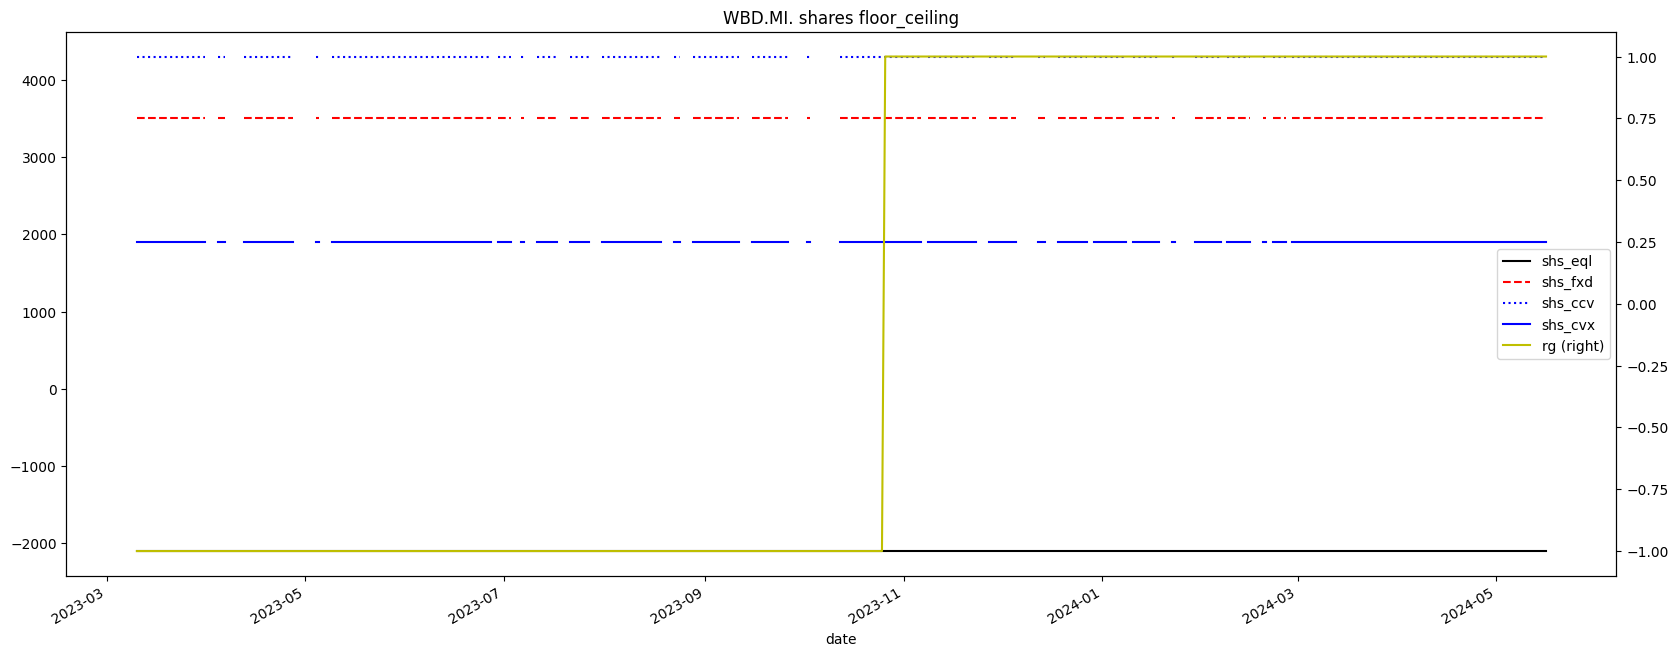

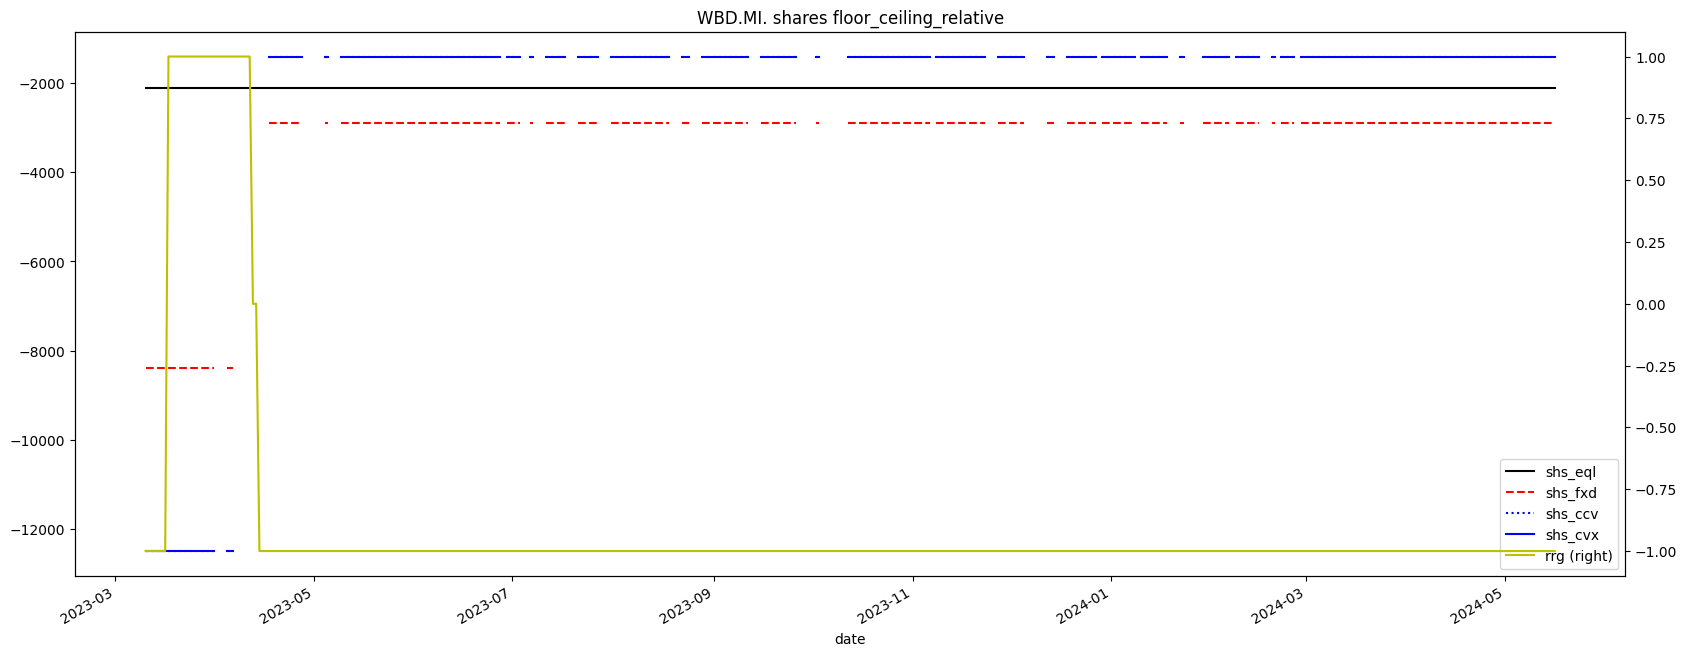

In [30]:
def plot_shares_signal(df, ticker, signal, m):
    df[['shs_eql','shs_fxd','shs_ccv','shs_cvx', signal]].plot(secondary_y=[signal],figsize=(20,8),style= ['k','r--','b:','b', 'y'],
                                                         title= str(ticker)+' shares ' + str(m))
    plt.show()
    
for i in range(len(signal)):  
    # print(i)
    df = output_signals[i]  # get the ith dataframe from df_signal  
    s = signal[i]  # get the ith signal from signal  
    m = method[i]
    plot_shares_signal(output_signals[i].tail(300), ticker, signal[i], method[i])
